# Introduction

In this notebook, we will generate multiple plots using data that has been produced using the data_generation.py file.These plots will be used as illustrations in the final paper.
Moreover, some machine learning models will be trained one the second part of this notebook.

## Part1: plots

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

save=True #Whether to save the plots as JPEG files in /inputs

#### Cell Obstacles:
The following section considers that each cell has an obstacle with probability p.
The parameters are the dimensions of the room: n\*m, and the probability p. The output is the probability that the resulting space is tilable with our 2:1 tiles.


1. Plots for one varying dimension m, with a fixed probability p, and a fixed dimension n.

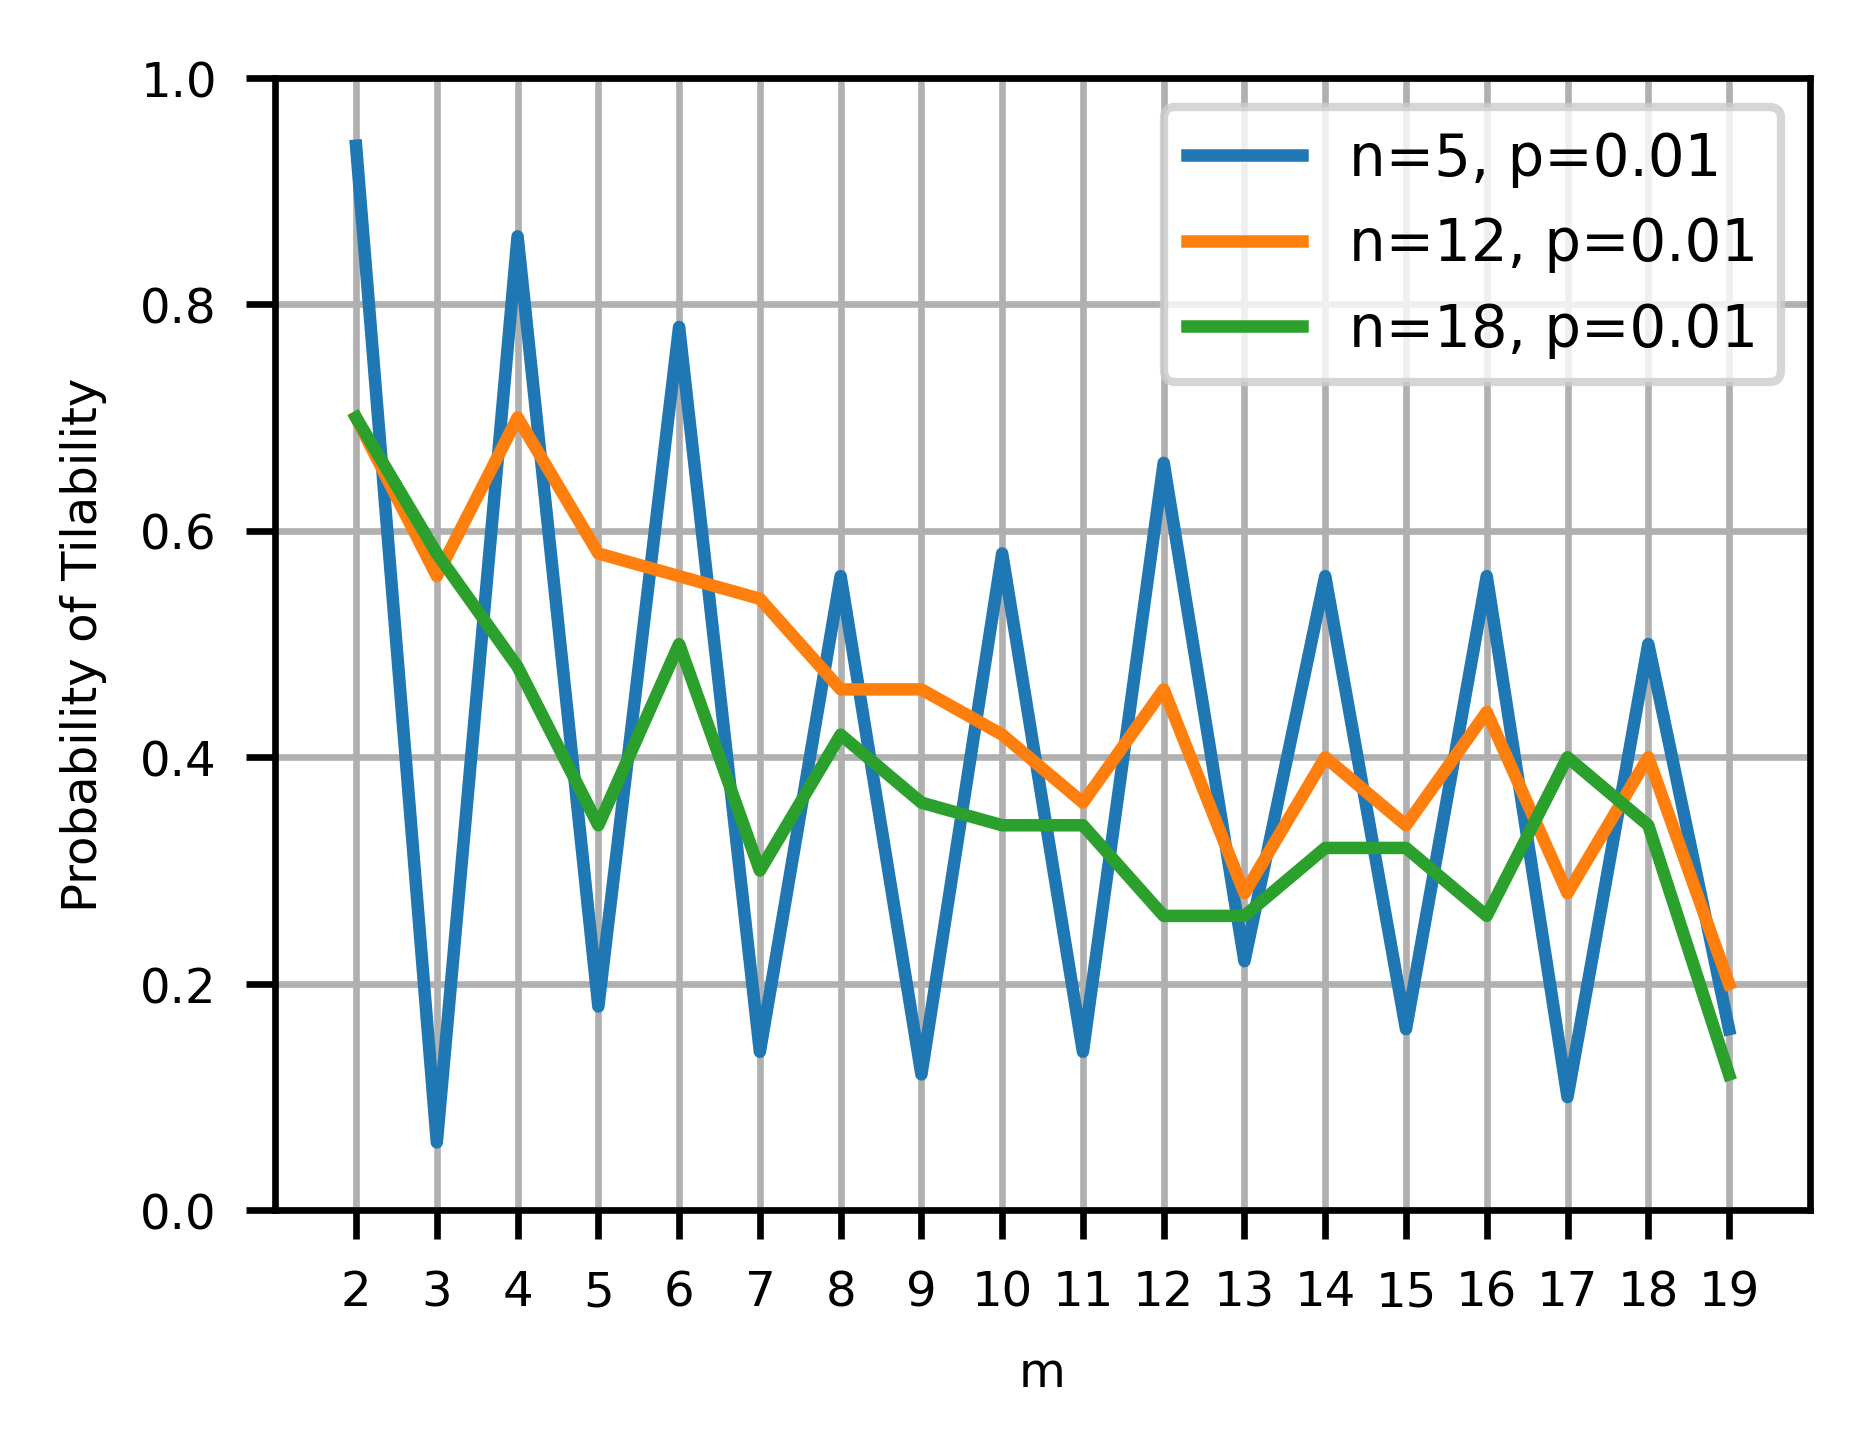

In [91]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../inputs/varying_dim_cell.csv')

plt.figure(figsize=(3.3, 2.5),dpi=600)
for p_value in df['p'].unique():
    for n_value in df['n'].unique():
        # Filter the DataFrame
        subset_df = df[df['n'] == n_value]

        # Plot probability as a function of m
        plt.plot(subset_df['m'], subset_df['probability'], label=f'n={n_value}, p={p_value}')

    plt.xlabel('m',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.legend(loc='upper right', fontsize='x-small')
    plt.grid(True)
    xmin, xmax, ymin, ymax = subset_df['m'].min()-1, subset_df['m'].max()+1, 0, 1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(range(int(subset_df['m'].min()), int(subset_df['m'].max()) + 1))
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    if save:
        plt.savefig(f'../inputs/Varying_dim_{p_value}.png', bbox_inches='tight')

plt.show()

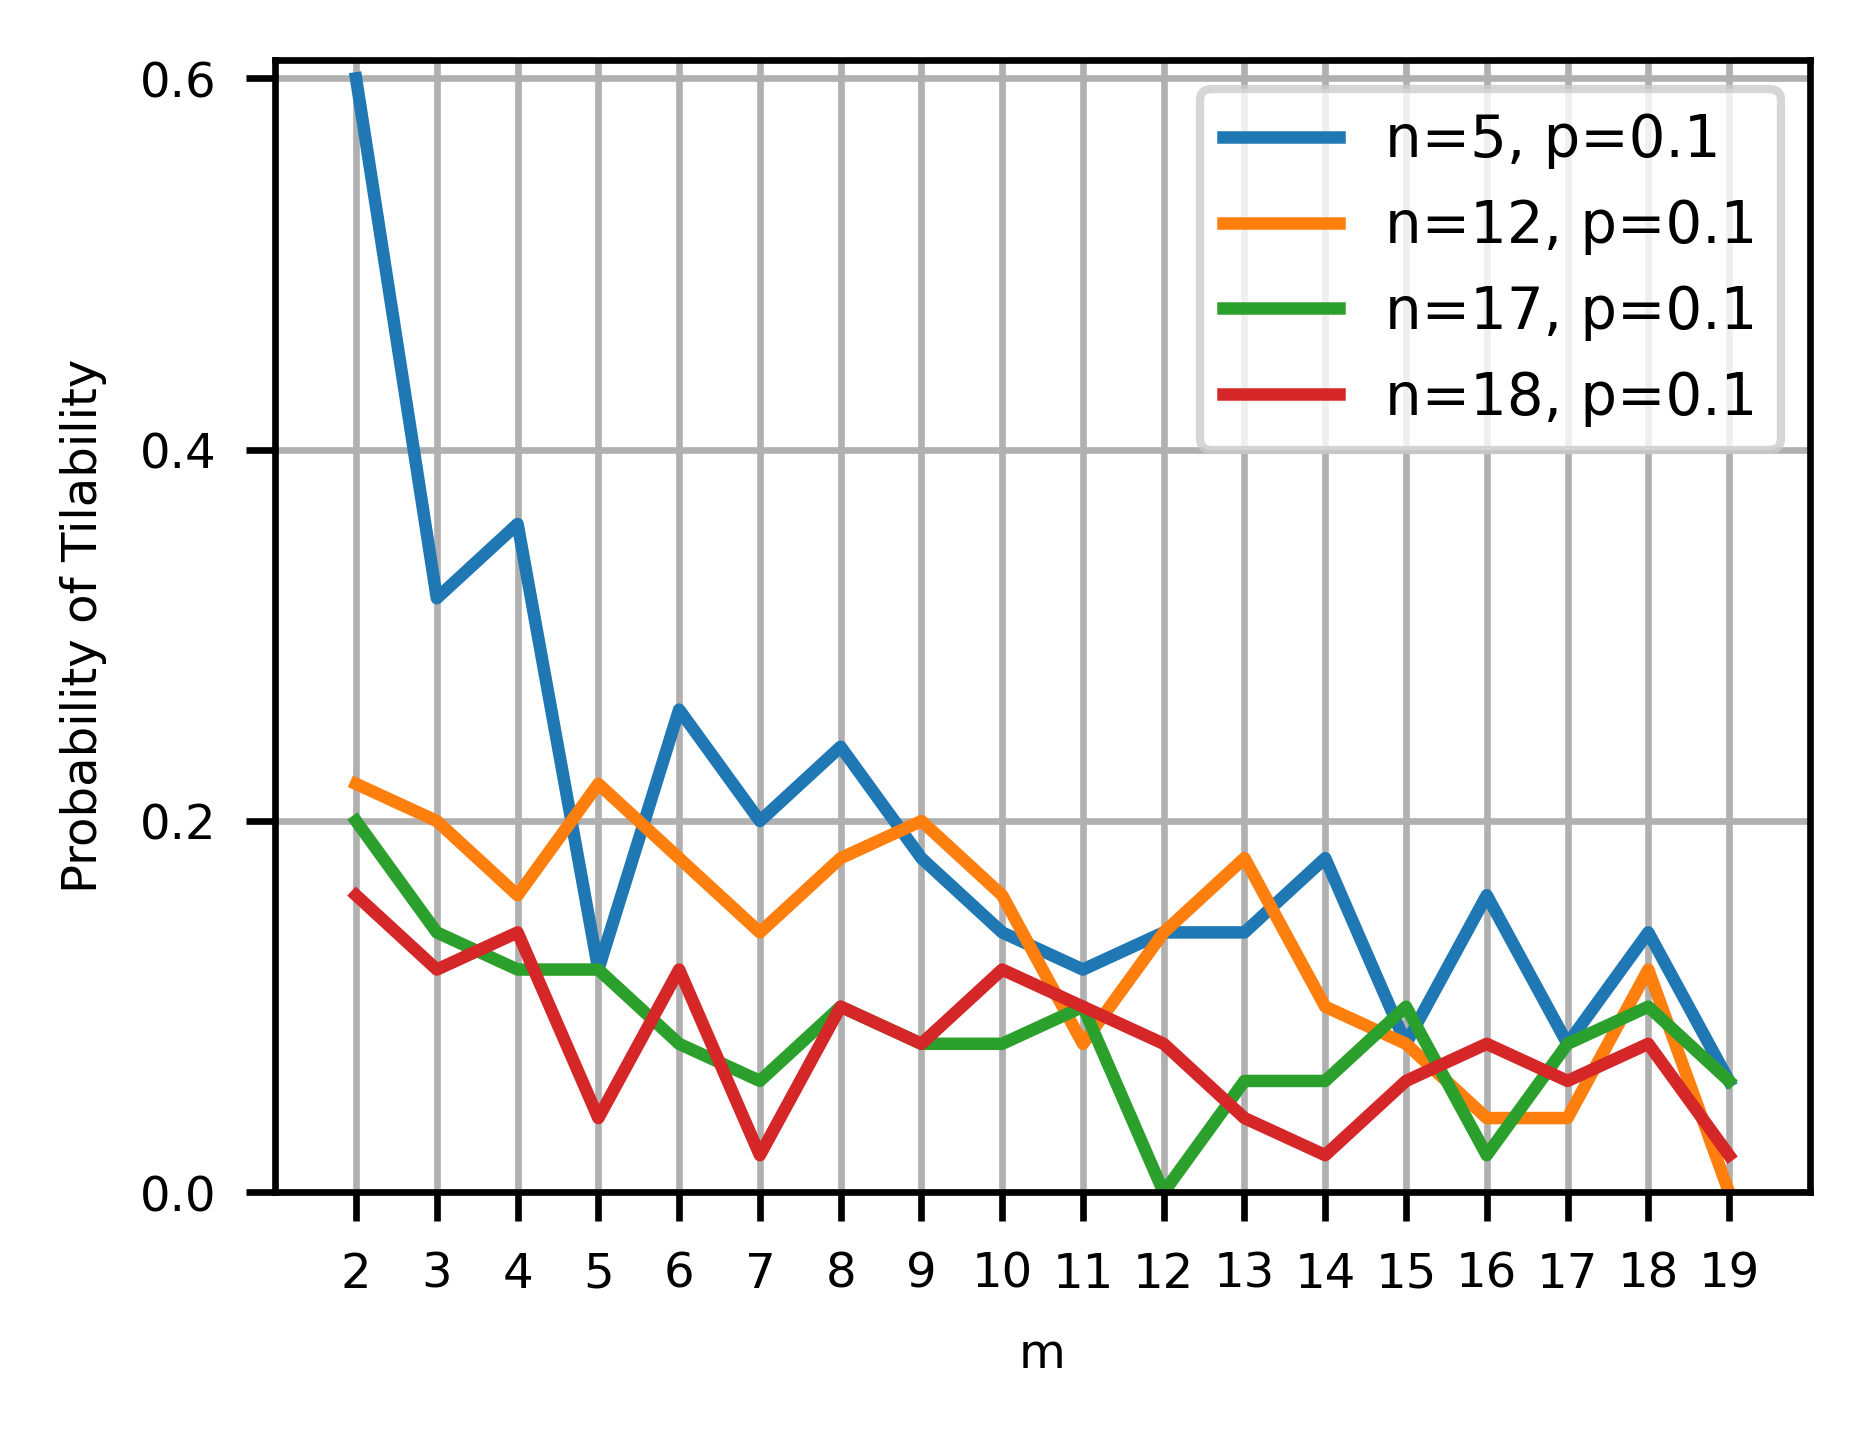

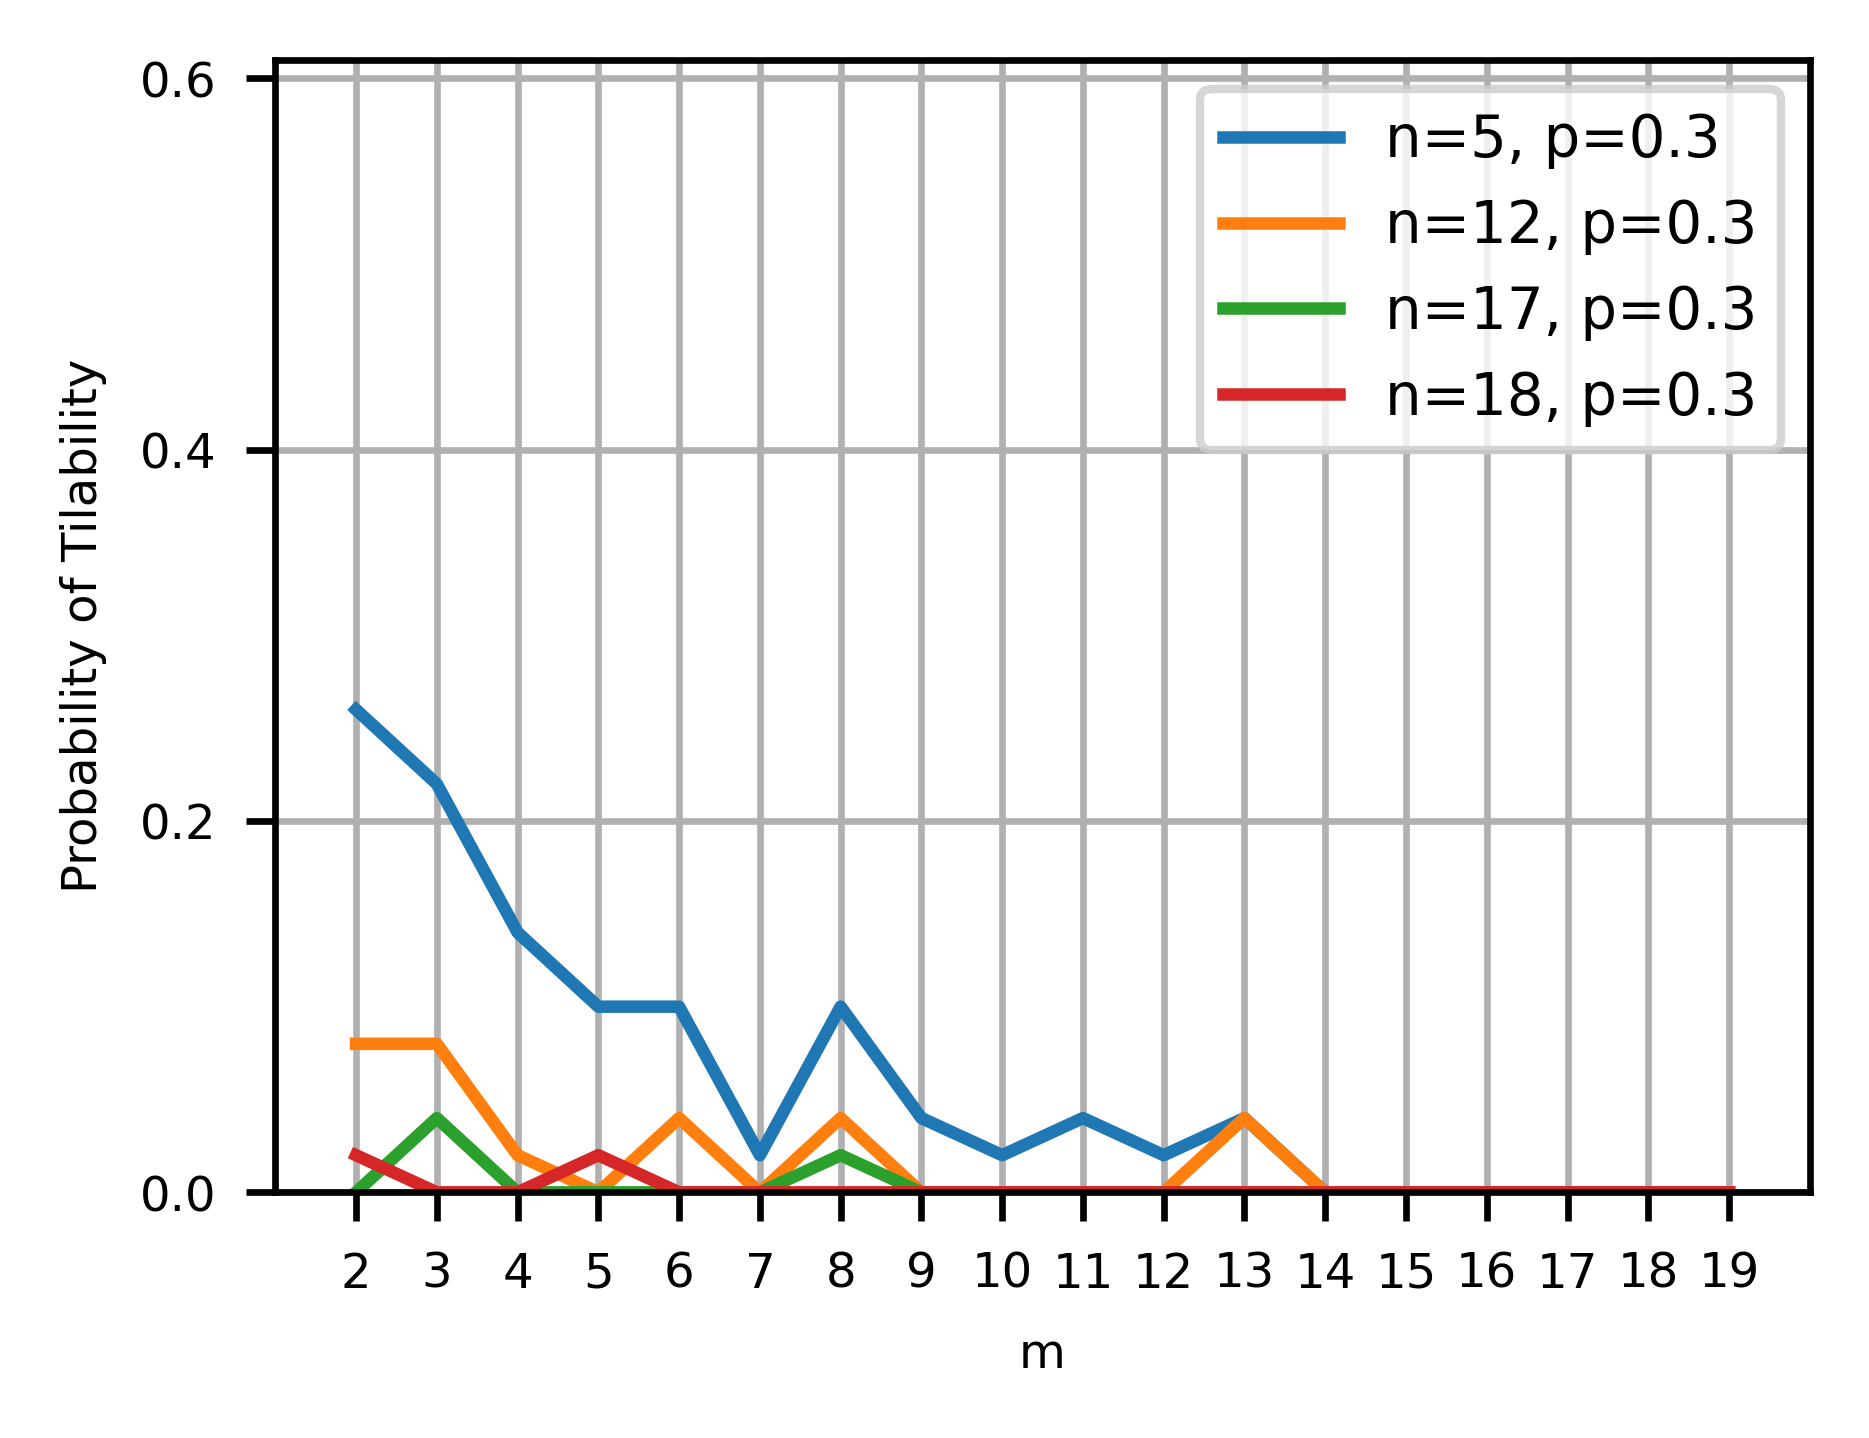

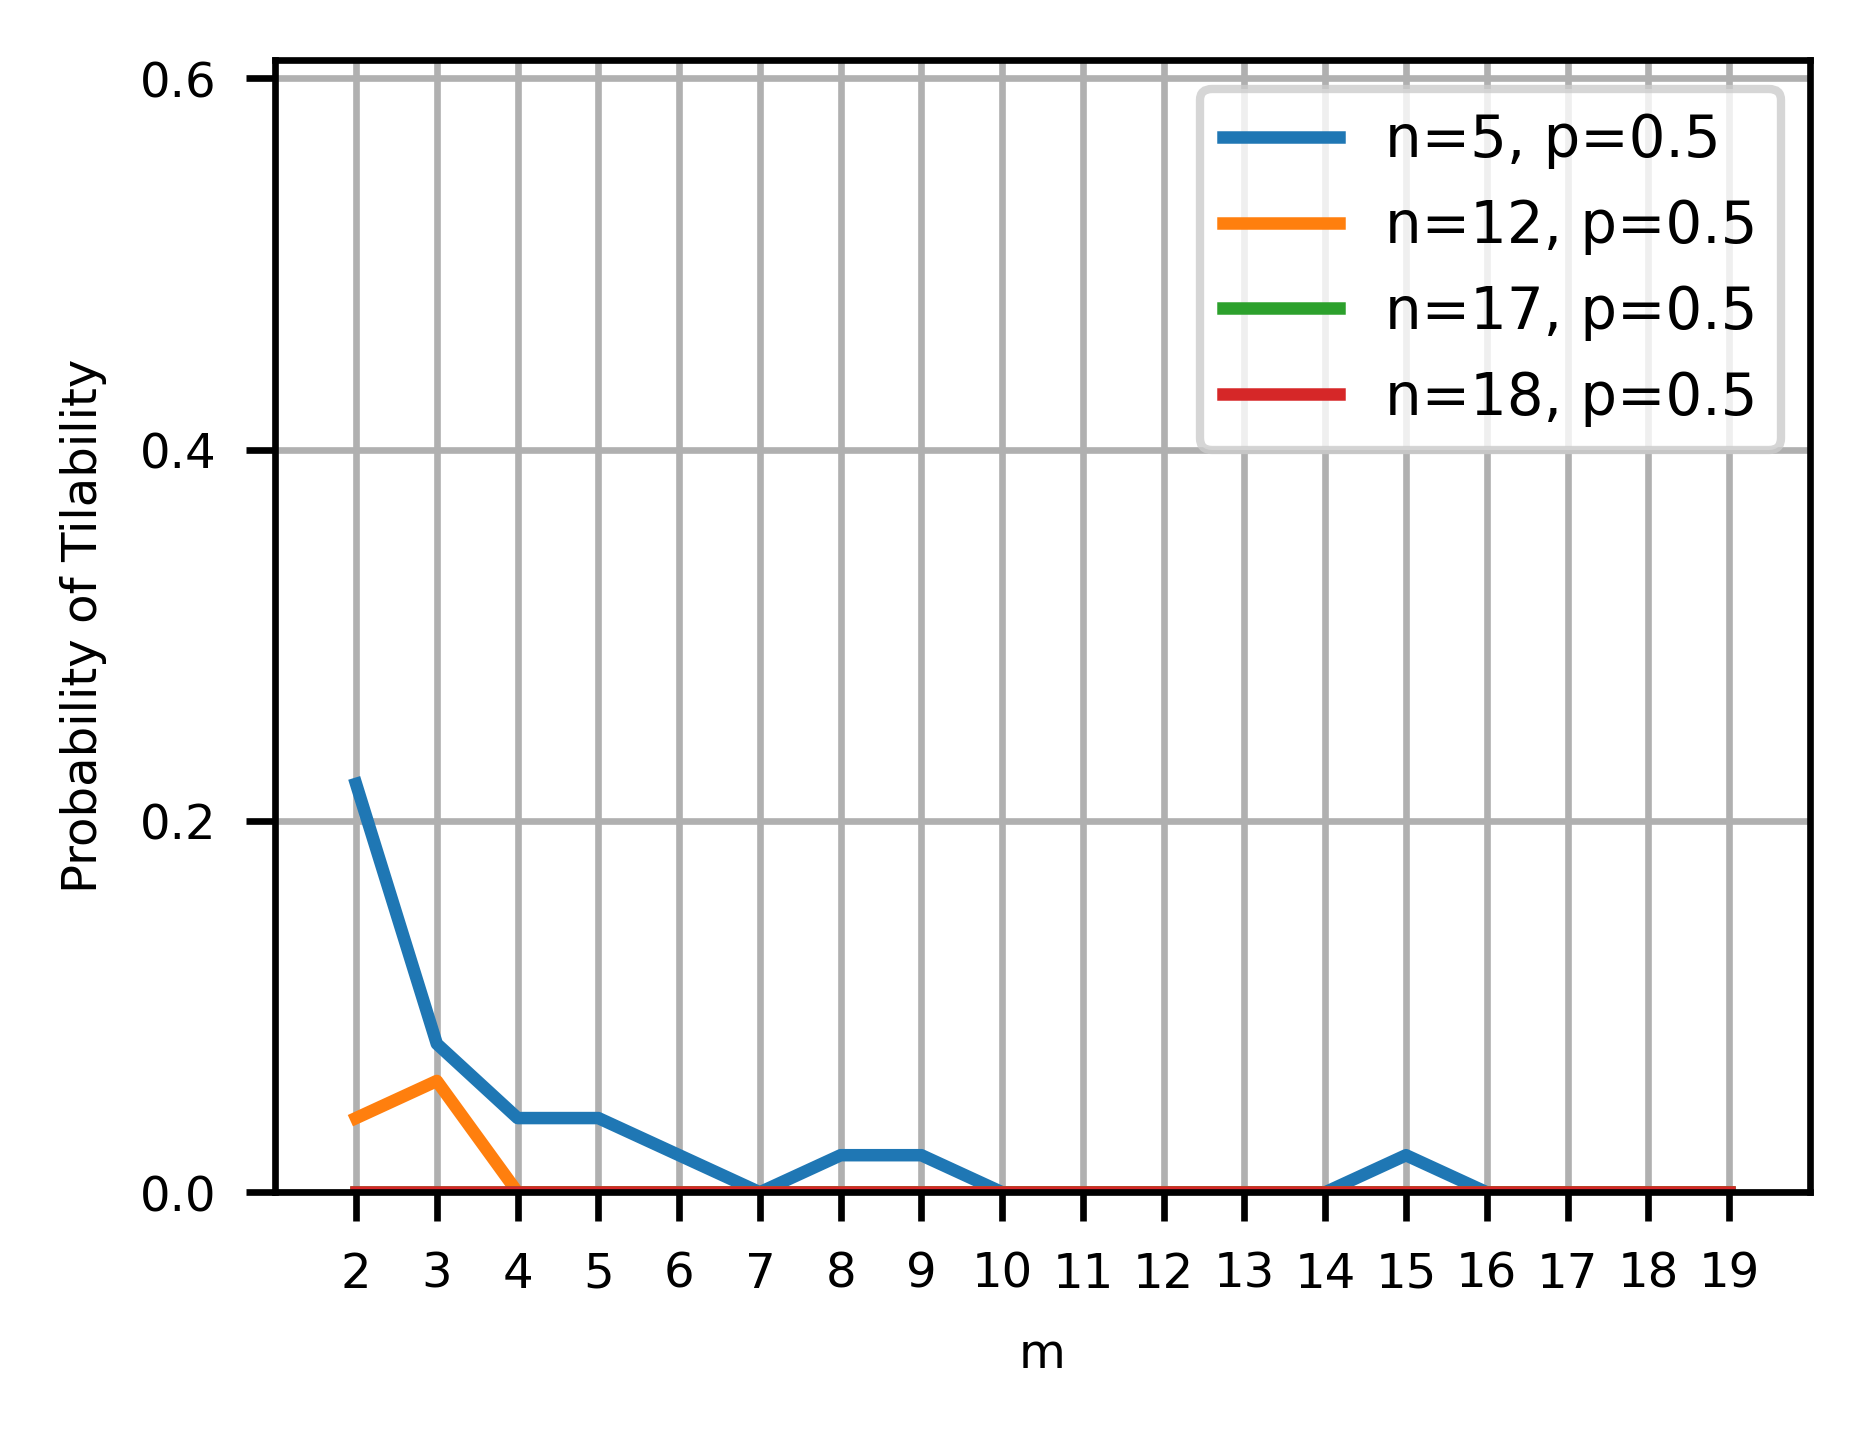

In [92]:
df = pd.read_csv('../inputs/varying_dim_cell_2.csv')

unique_p_values = df['p'].unique()

# Loop through unique values of 'p'
for p_value in unique_p_values:
    # Create a new figure for each 'p'
    plt.figure(figsize=(3.3, 2.5),dpi=600)
    
    # Filter the DataFrame for the current value of 'p'
    subset_df_p = df[df['p'] == p_value]
    unique_n_values = subset_df_p['n'].unique()
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        # Plot probability as a function of m for the current n and p
        plt.plot(subset_df['m'], subset_df['probability'], label=f'n={n_value}, p={p_value}')
    
    plt.xlabel('m',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.legend(loc='upper right', fontsize='x-small')
    plt.grid(True)
    xmin, xmax, ymin, ymax = subset_df['m'].min()-1, subset_df['m'].max()+1, 0, 0.61
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(range(int(subset_df['m'].min()), int(subset_df['m'].max()) + 1))
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    if save:
        plt.savefig(f'../inputs/Varying_dim_{p_value}.png',bbox_inches='tight')
    
plt.show()


### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

2. plots for varying probability p of obstacle existence, and fixed dimensions.

/tmp/ipykernel_18437/3464304305.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_18437/3464304305.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_18437/3464304305.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


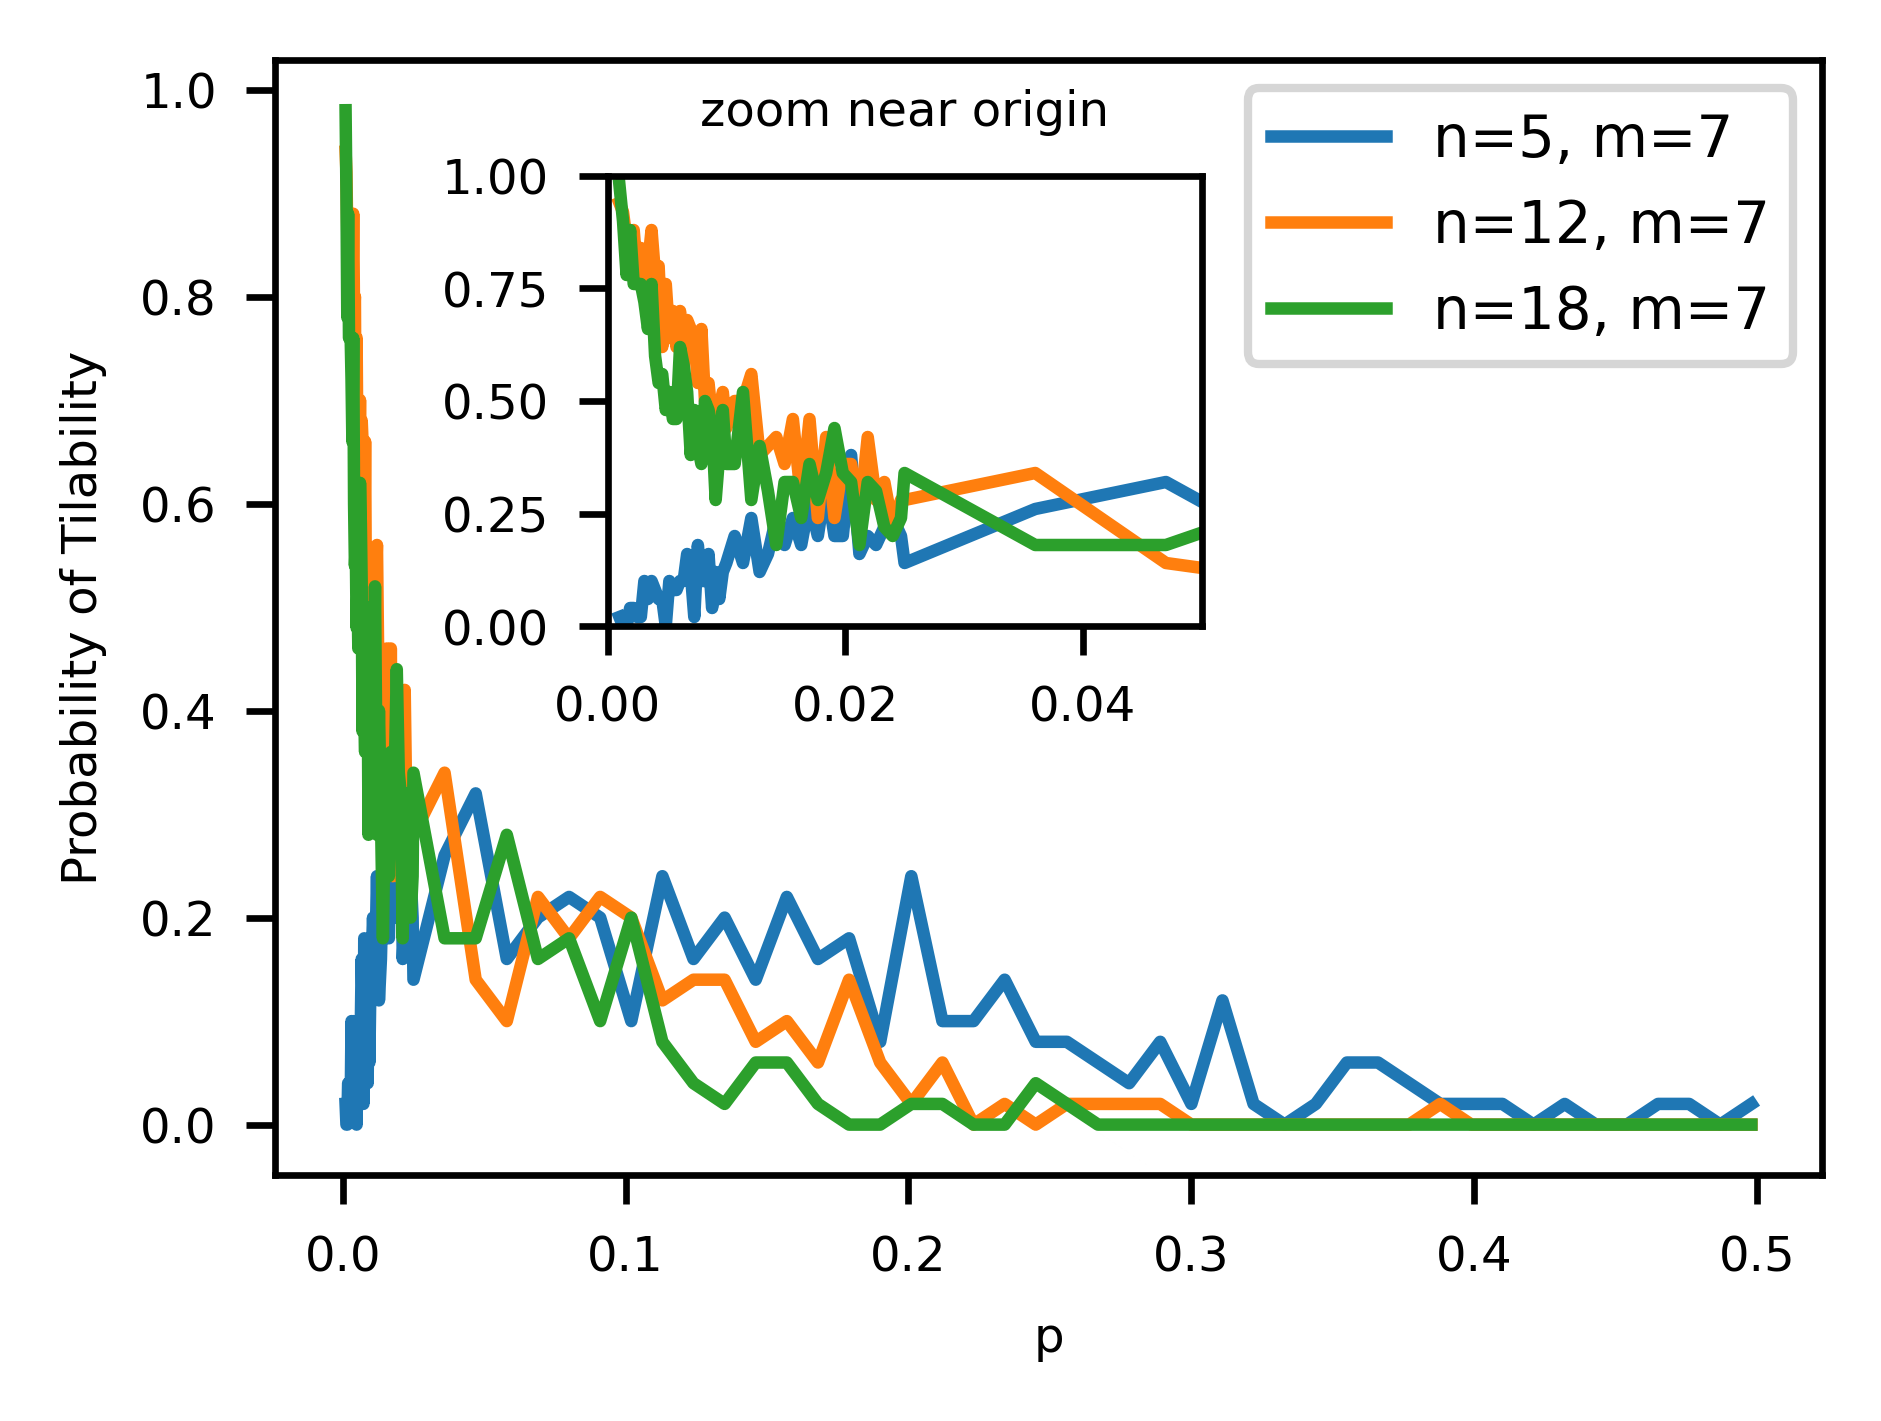

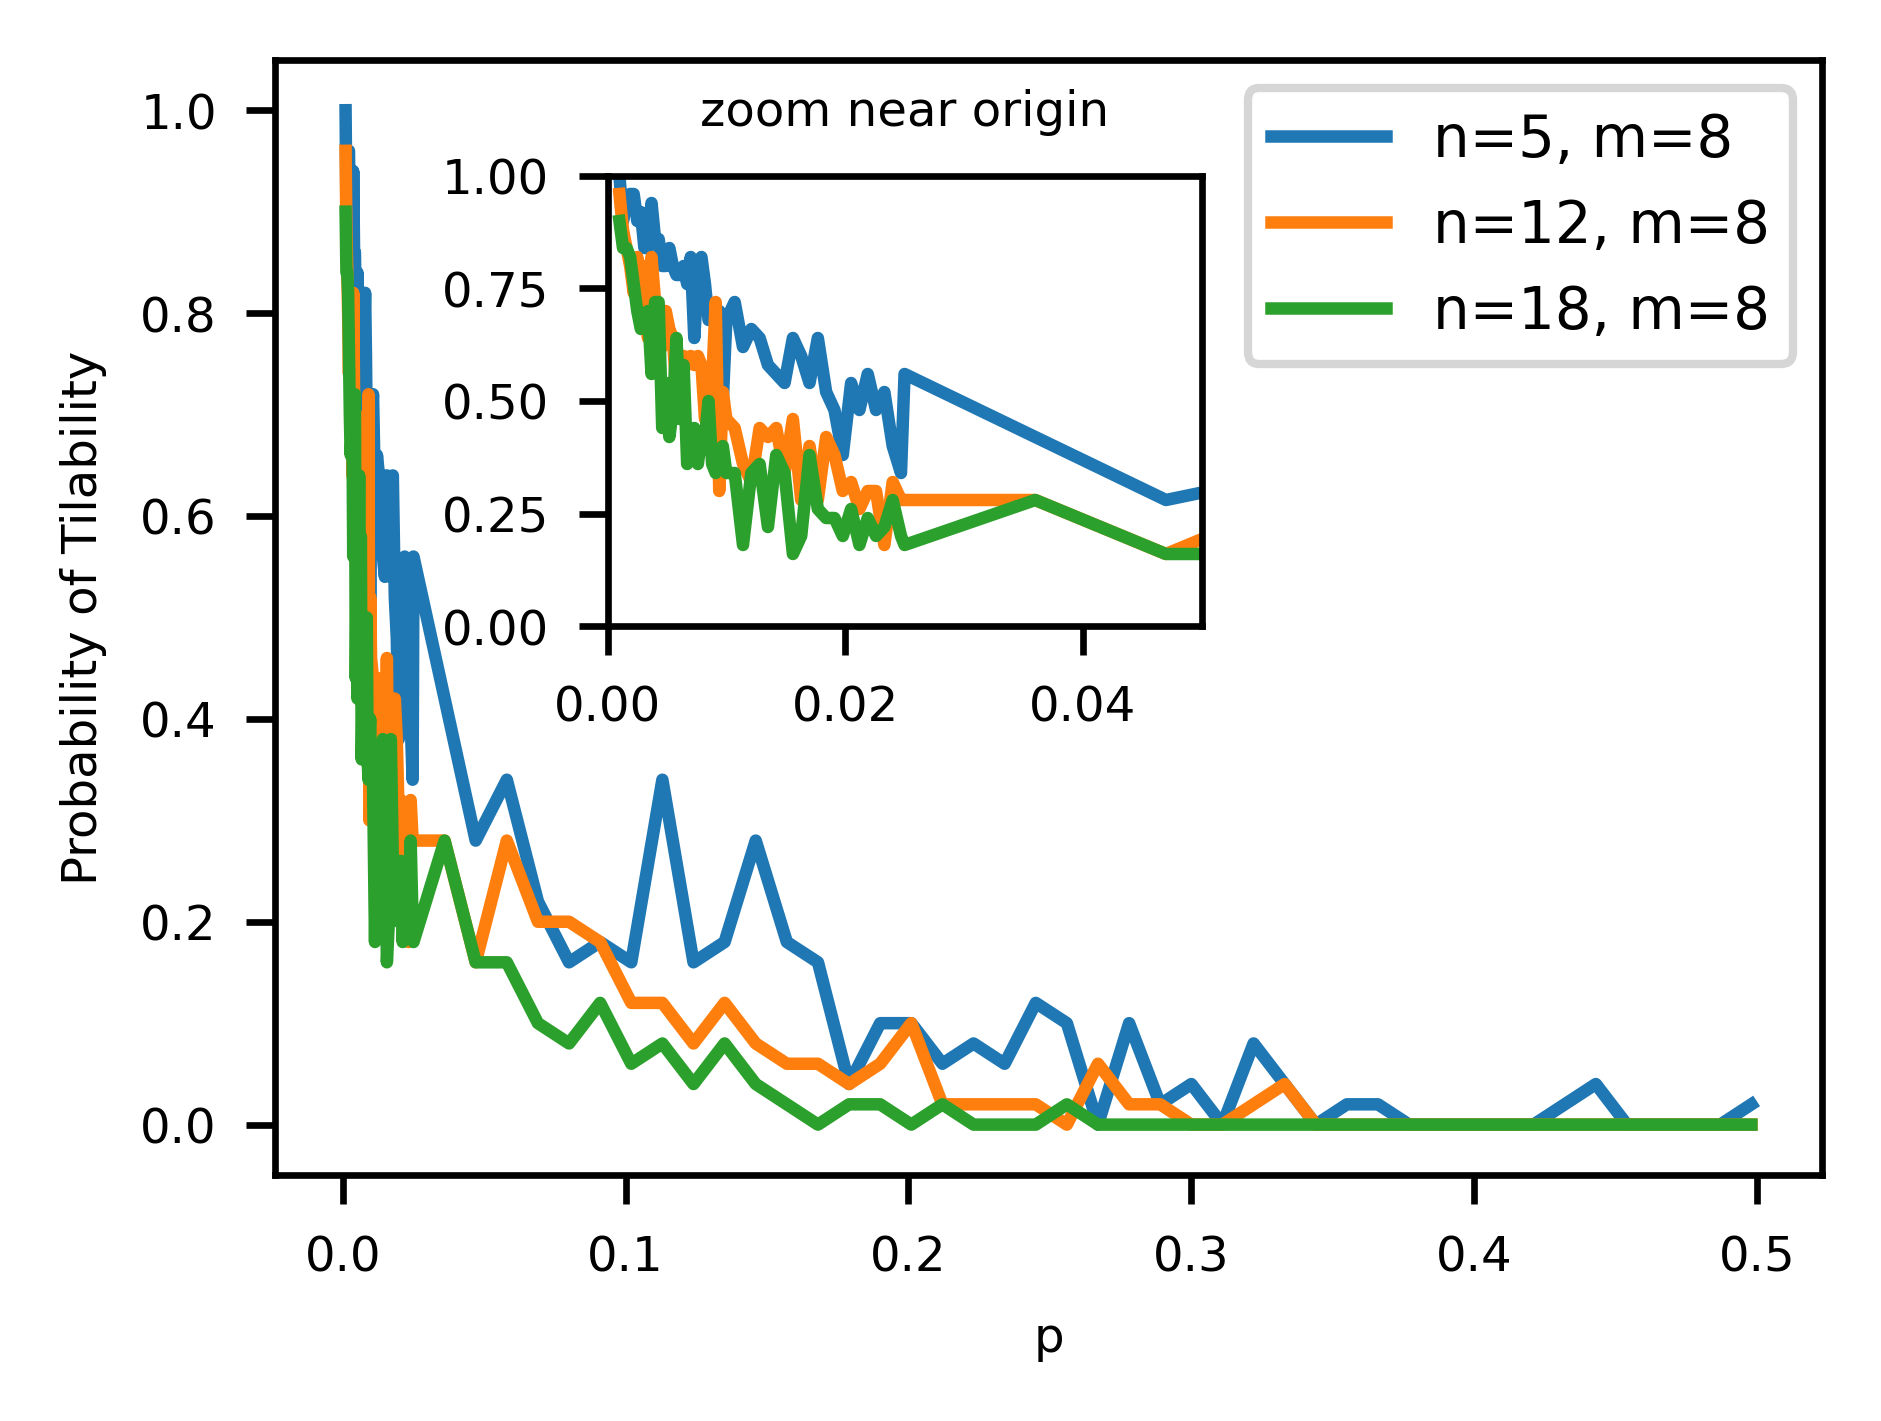

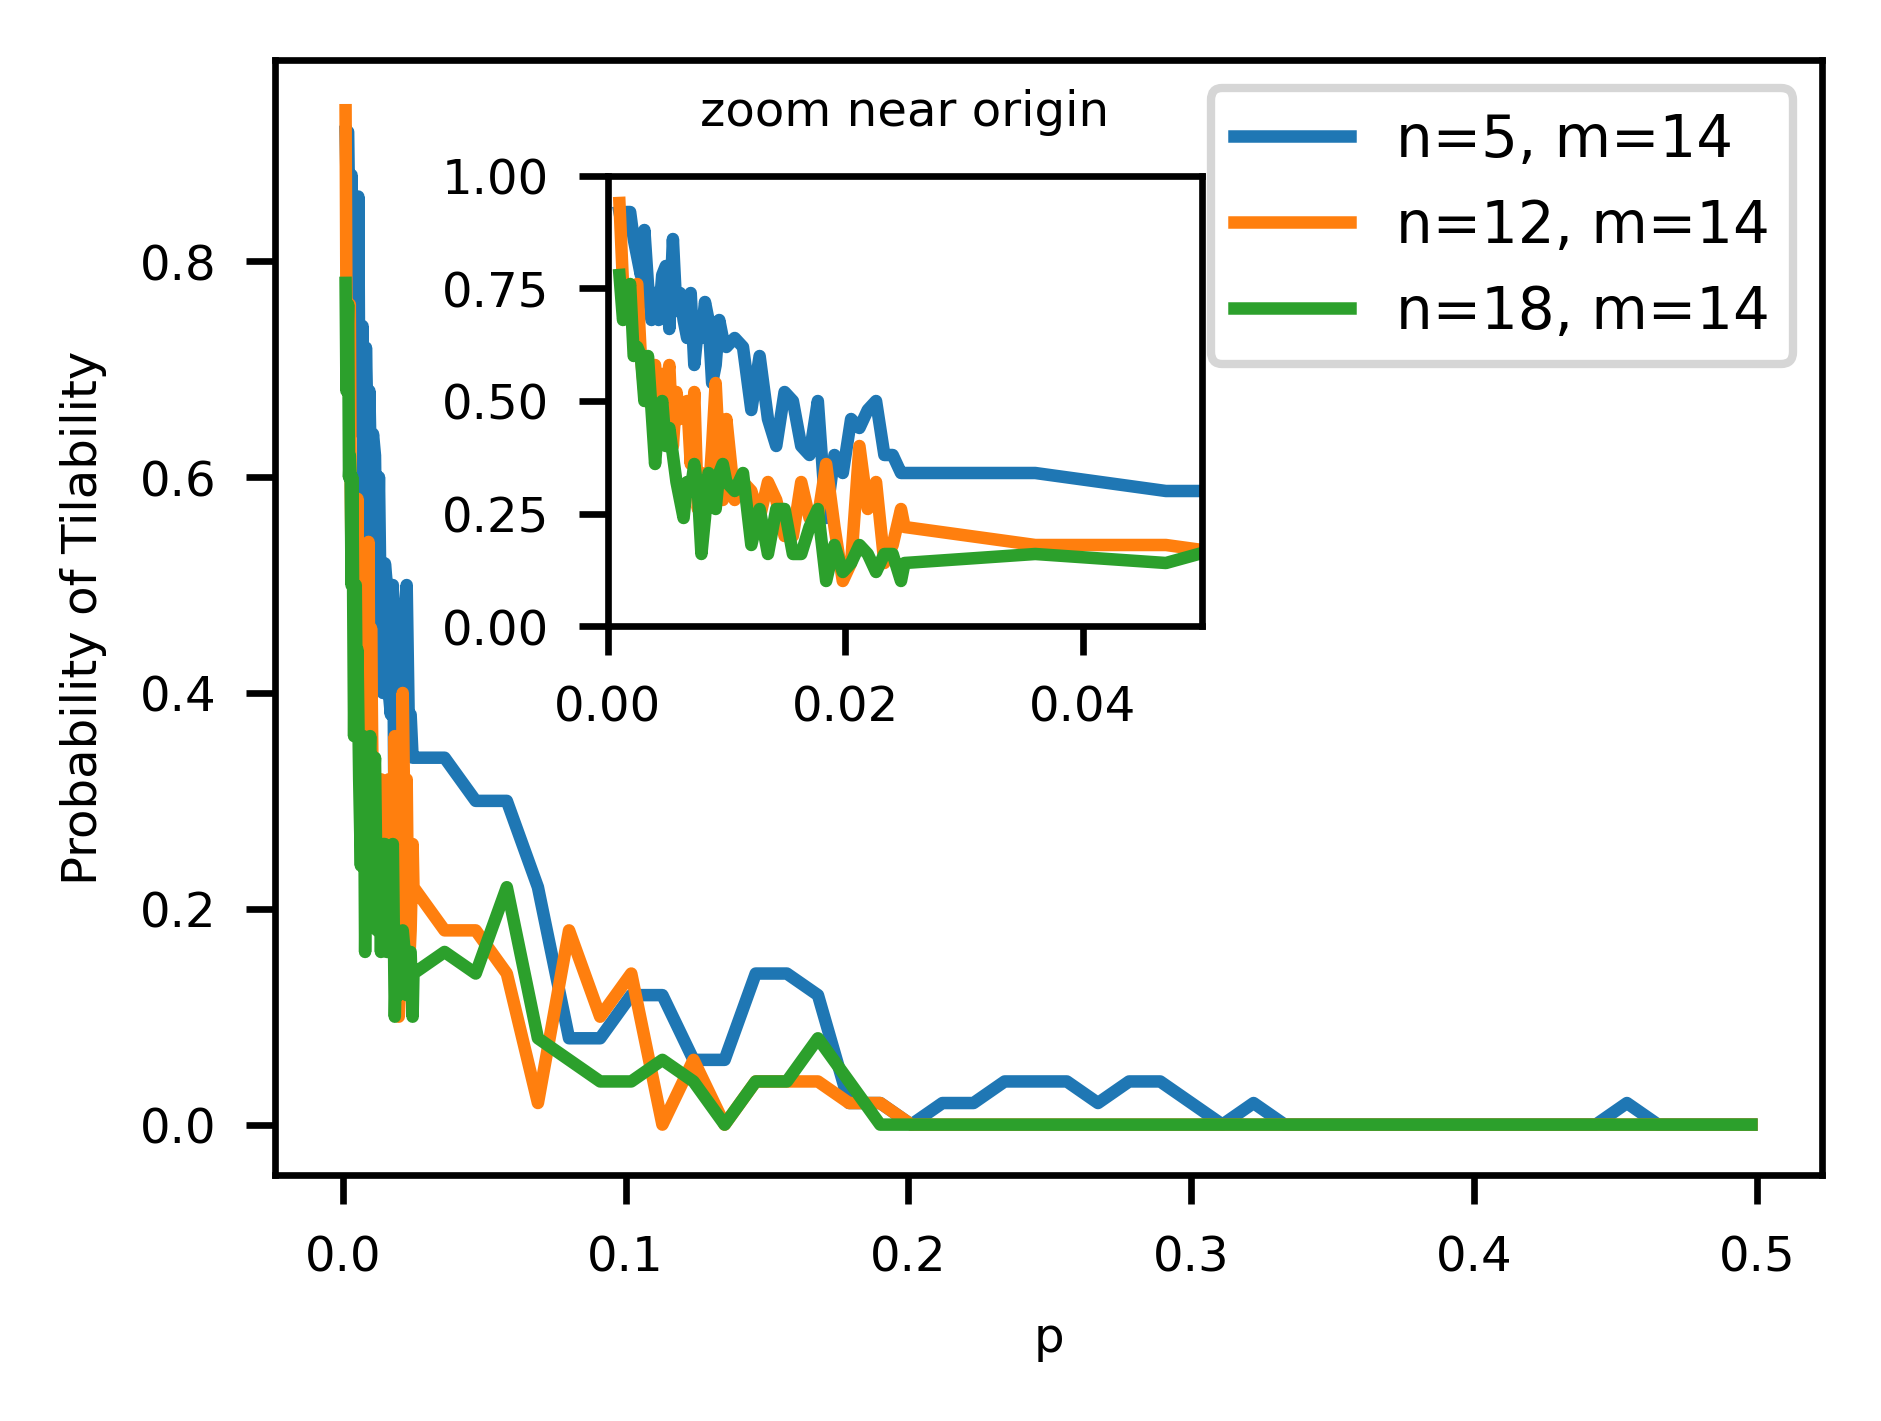

In [93]:
#Varying probability

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../inputs/varying_p_cell.csv')

unique_m_values = df['m'].unique()

# Loop through unique values of m
for m_value in unique_m_values:
    # Create a new figure for each m
    fig, ax = plt.subplots(figsize=(3.3, 2.5),dpi=600)
    plt.xlabel('p',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    
    subset_df_p = df[df['m'] == m_value]
    
    unique_n_values = subset_df_p['n'].unique()
    inset_ax = fig.add_axes([0.6, 0.6, 0.30, 0.30])
    inset_ax.set_position([0.322, 0.55, 0.30, 0.3])
    fig.tight_layout()
    # Loop through unique values of n
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        # Plot probability as a function of current p
        ax.plot(subset_df['p'], subset_df['probability'], label=f'n={n_value}, m={m_value}')
        inset_ax.plot(subset_df['p'], subset_df['probability'])
        inset_ax.set_title('zoom near origin',fontsize='xx-small')
        inset_ax.set_xlim(0, 0.05)
        inset_ax.set_ylim(0, 1)
        inset_ax.tick_params(axis='both', which='both', labelsize='xx-small')
    
    ax.legend(loc='upper right', fontsize='x-small')
    if save:
        plt.savefig(f'../inputs/Varying_p_{m_value}.png', bbox_inches='tight')
    
plt.show()



#### Wall Obstacles:
The following section considers that each row or column is a wall with probability p.
The parameters are the dimensions of the room: n\*m, and the probability p. The output is the probability that the resulting space is tilable with our 2:1 tiles.


1. Plots for one varying dimension m, with a fixed probability p, and a fixed dimension n.

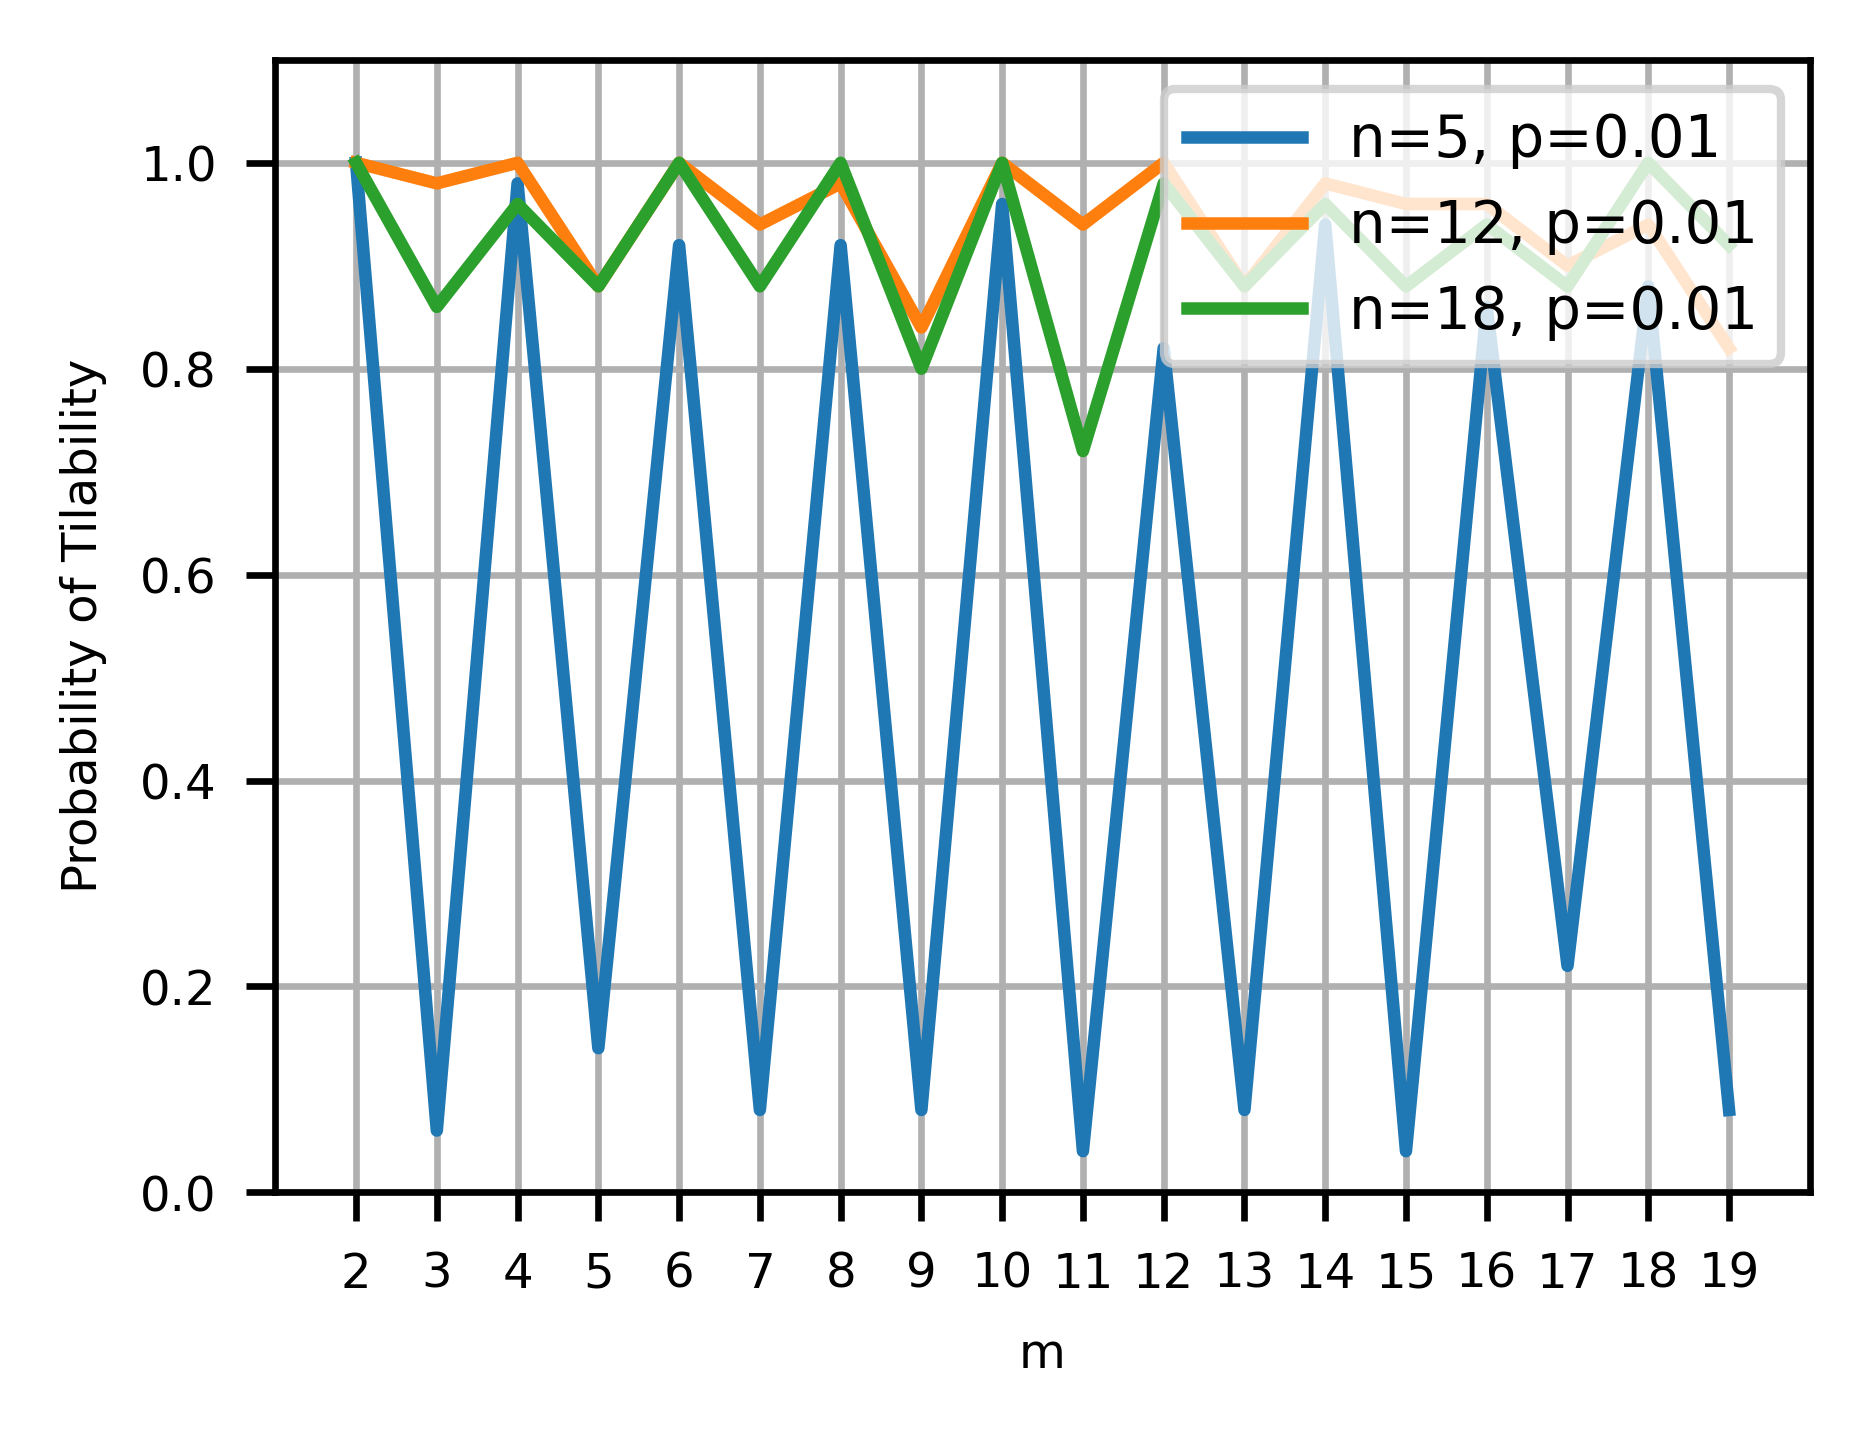

In [94]:
#walls

df = pd.read_csv('../inputs/varying_dim_wall.csv')

unique_p_values = df['p'].unique()

for p_value in unique_p_values:
    # Create a new figure for each 'p'
    plt.figure(figsize=(3.3, 2.5),dpi=600)
    
    # Filter the DataFrame for the current value of p
    subset_df_p = df[df['p'] == p_value]
    
    unique_n_values = subset_df_p['n'].unique()
    
    # Loop through unique values of 'n'
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        # Plot probability as a function of m
        plt.plot(subset_df['m'], subset_df['probability'], label=f'n={n_value}, p={p_value}')
    
    plt.xlabel('m',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.legend(loc='upper right', fontsize='x-small')
    plt.grid(True)
    xmin, xmax, ymin, ymax = subset_df['m'].min()-1, subset_df['m'].max()+1, 0, 1.1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(range(int(subset_df['m'].min()), int(subset_df['m'].max()) + 1))
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    if save:
        plt.savefig(f'../inputs/Varying_dim_{p_value}_wall.png', bbox_inches='tight')
    
plt.show()


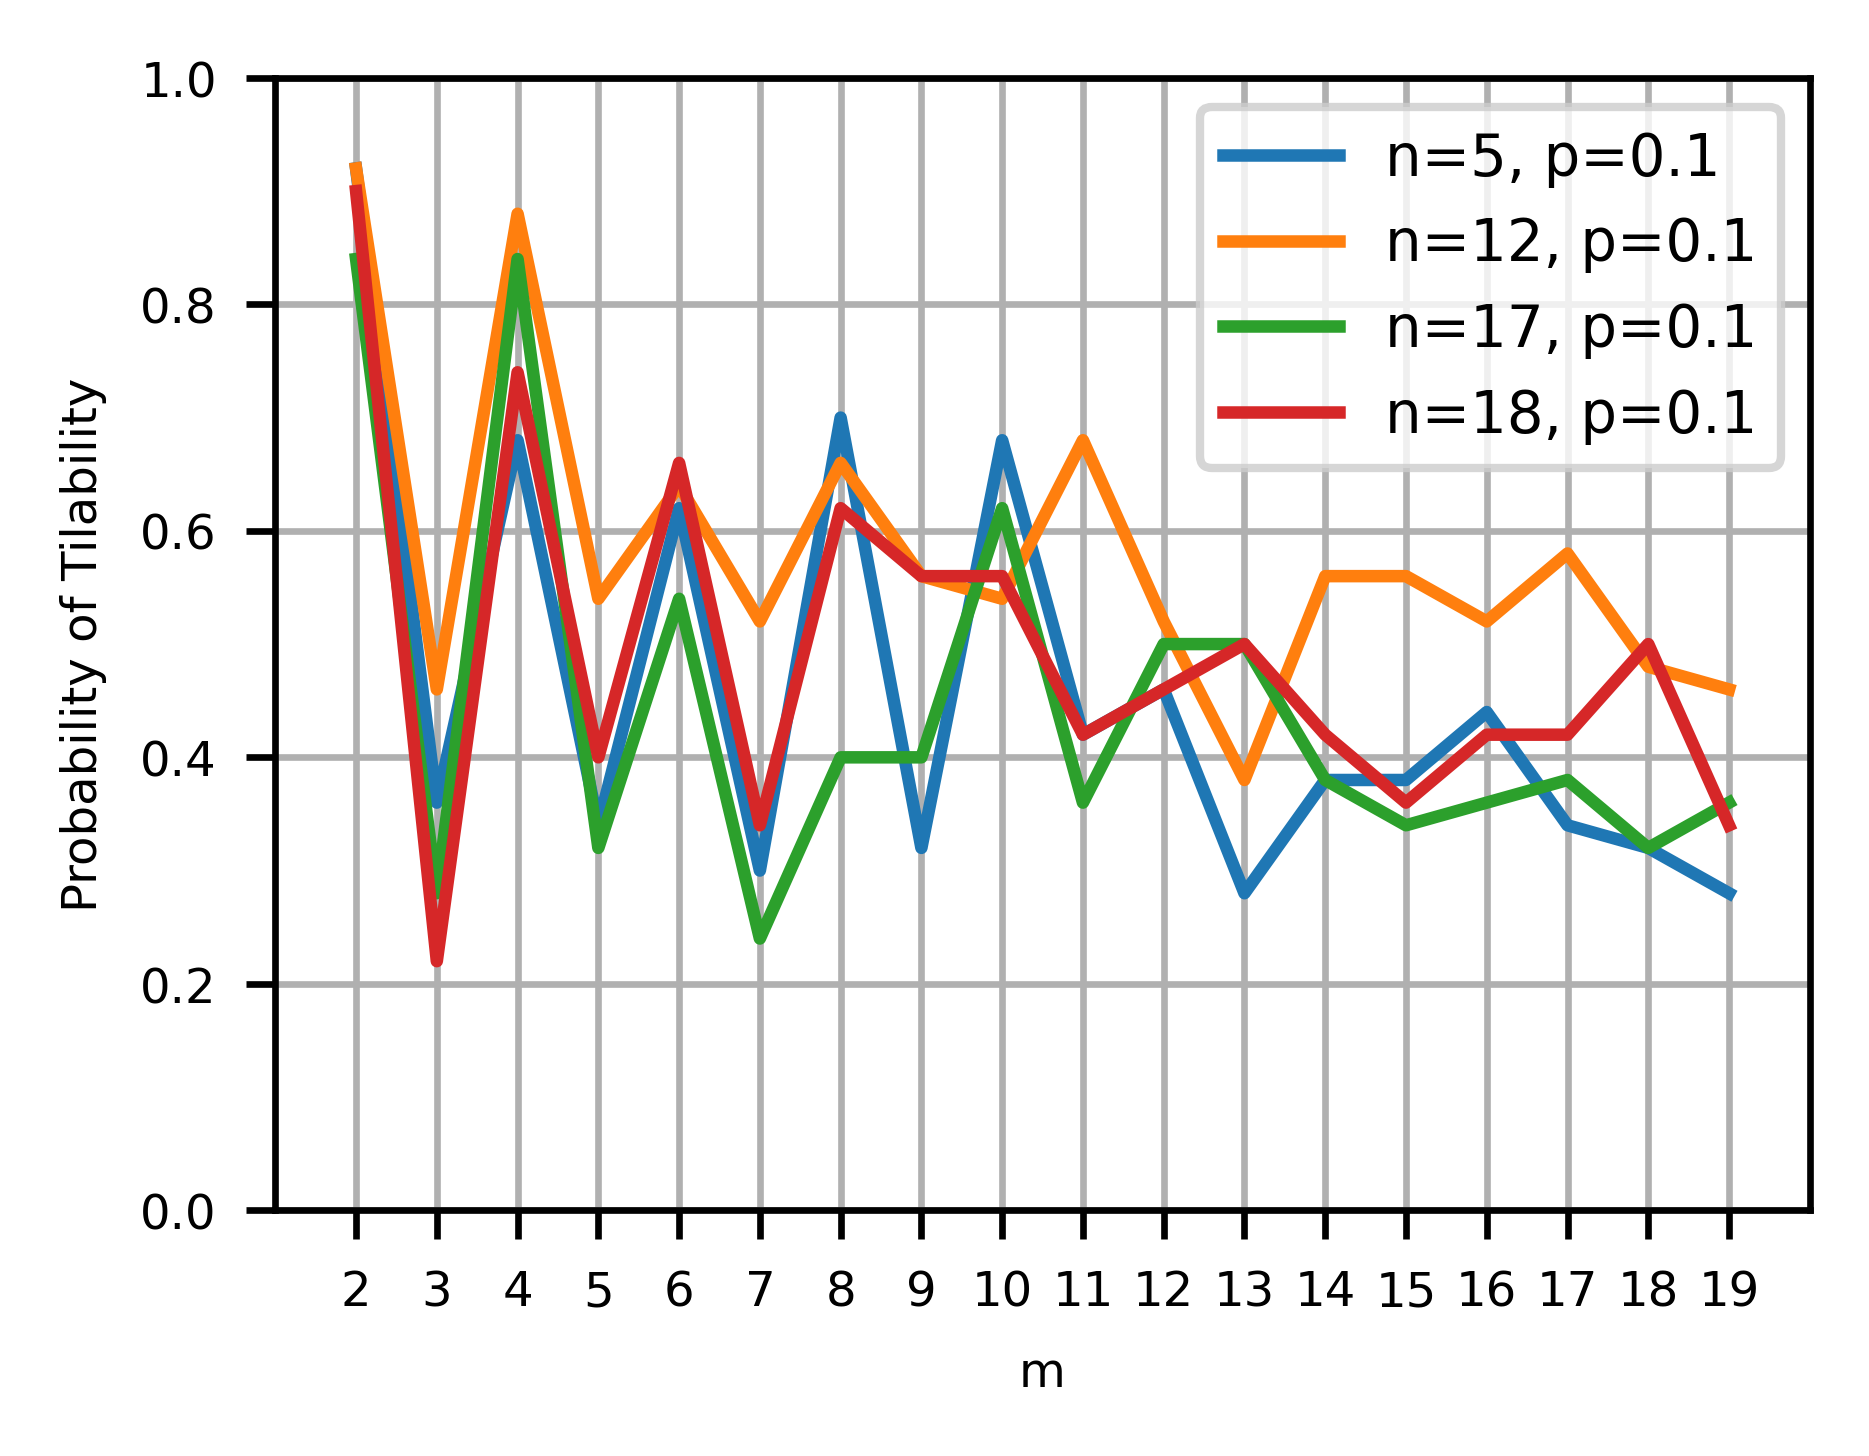

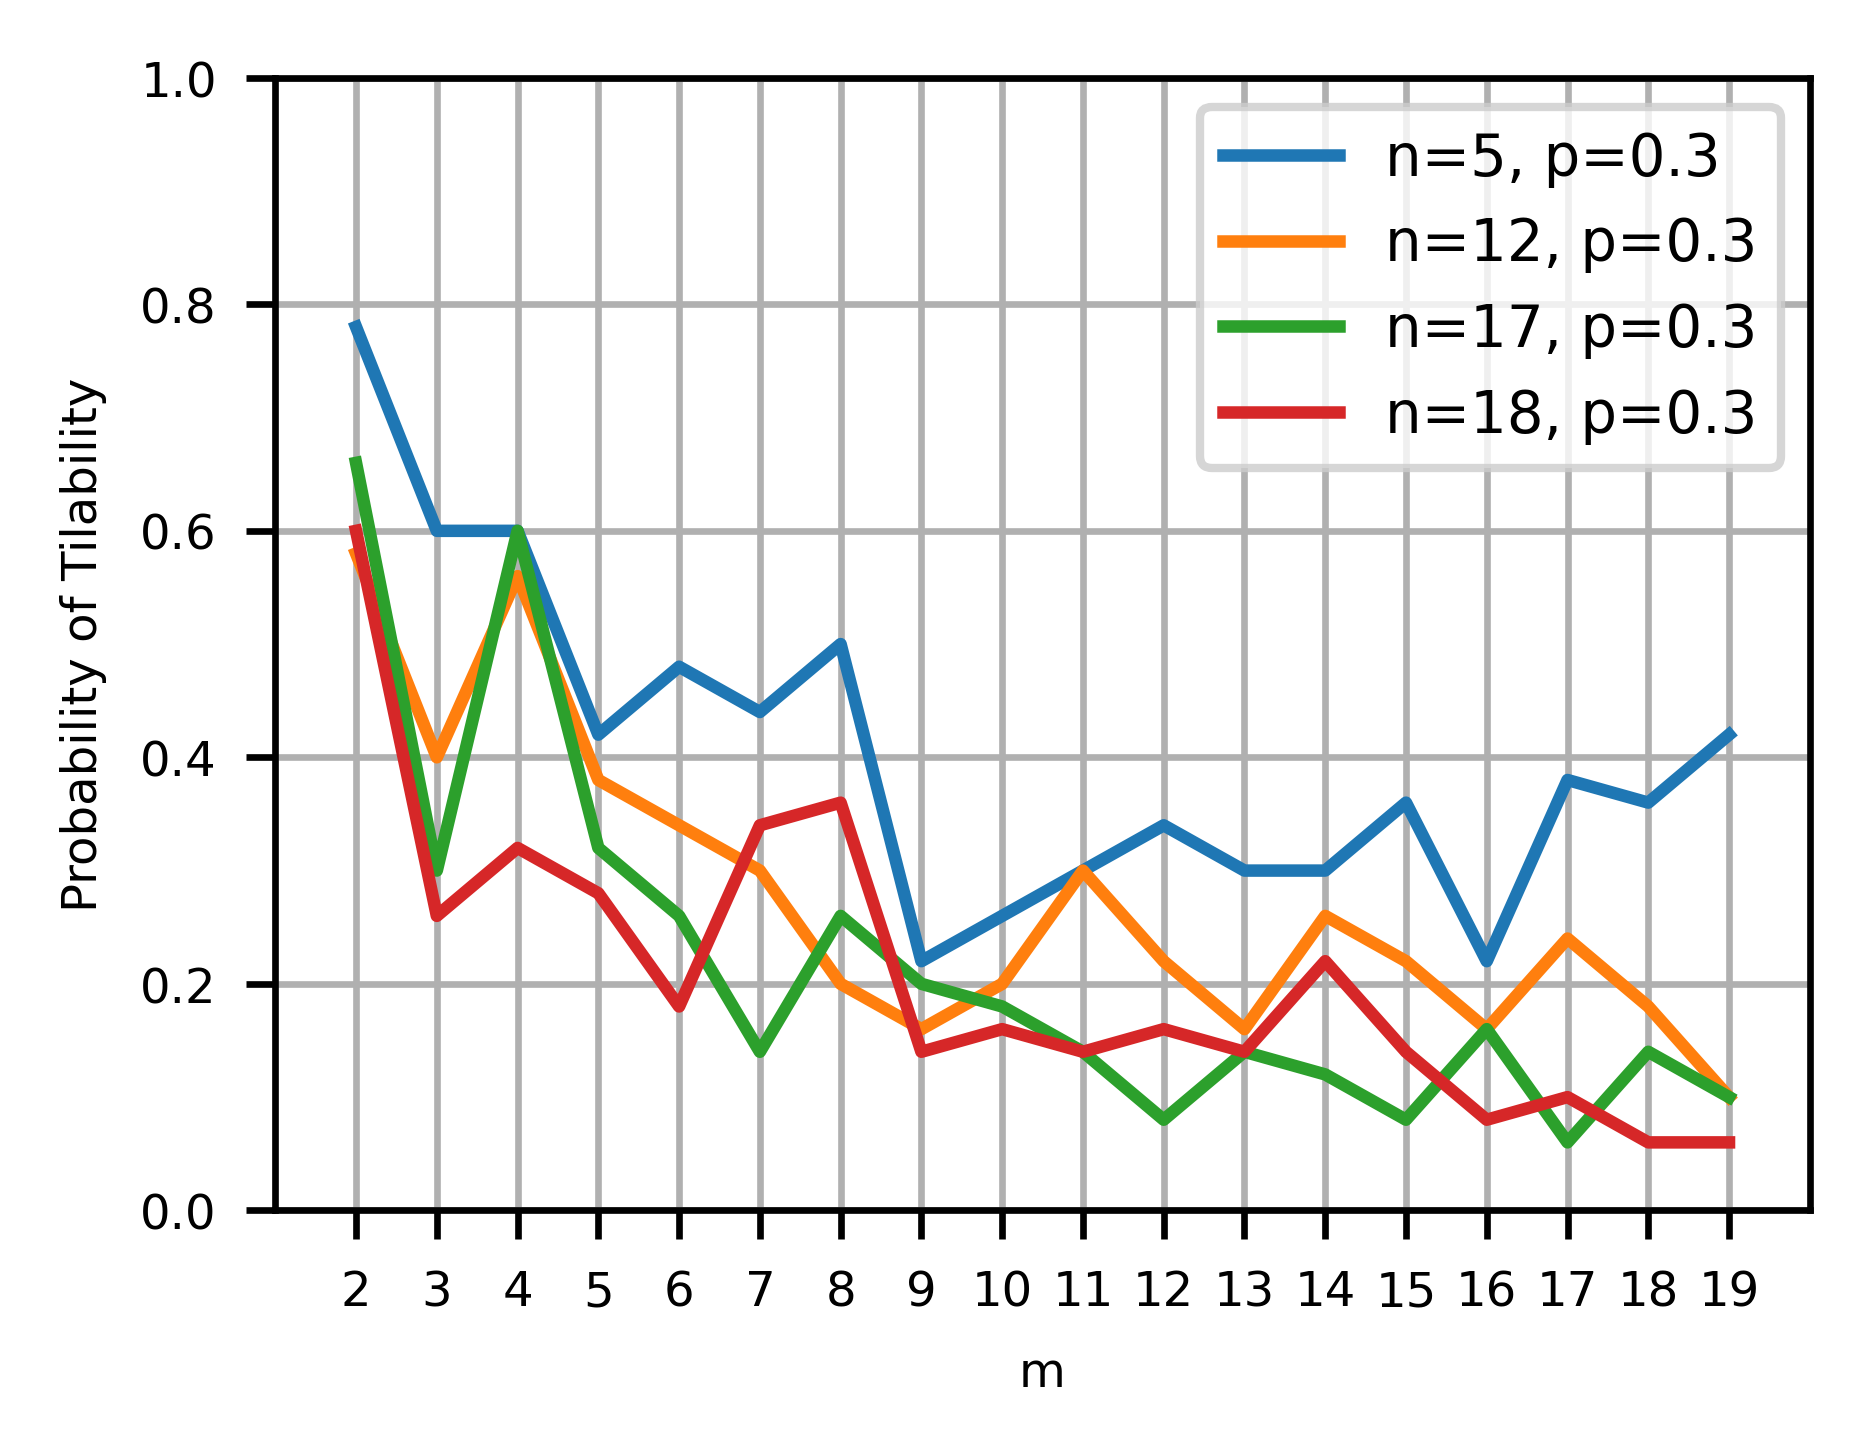

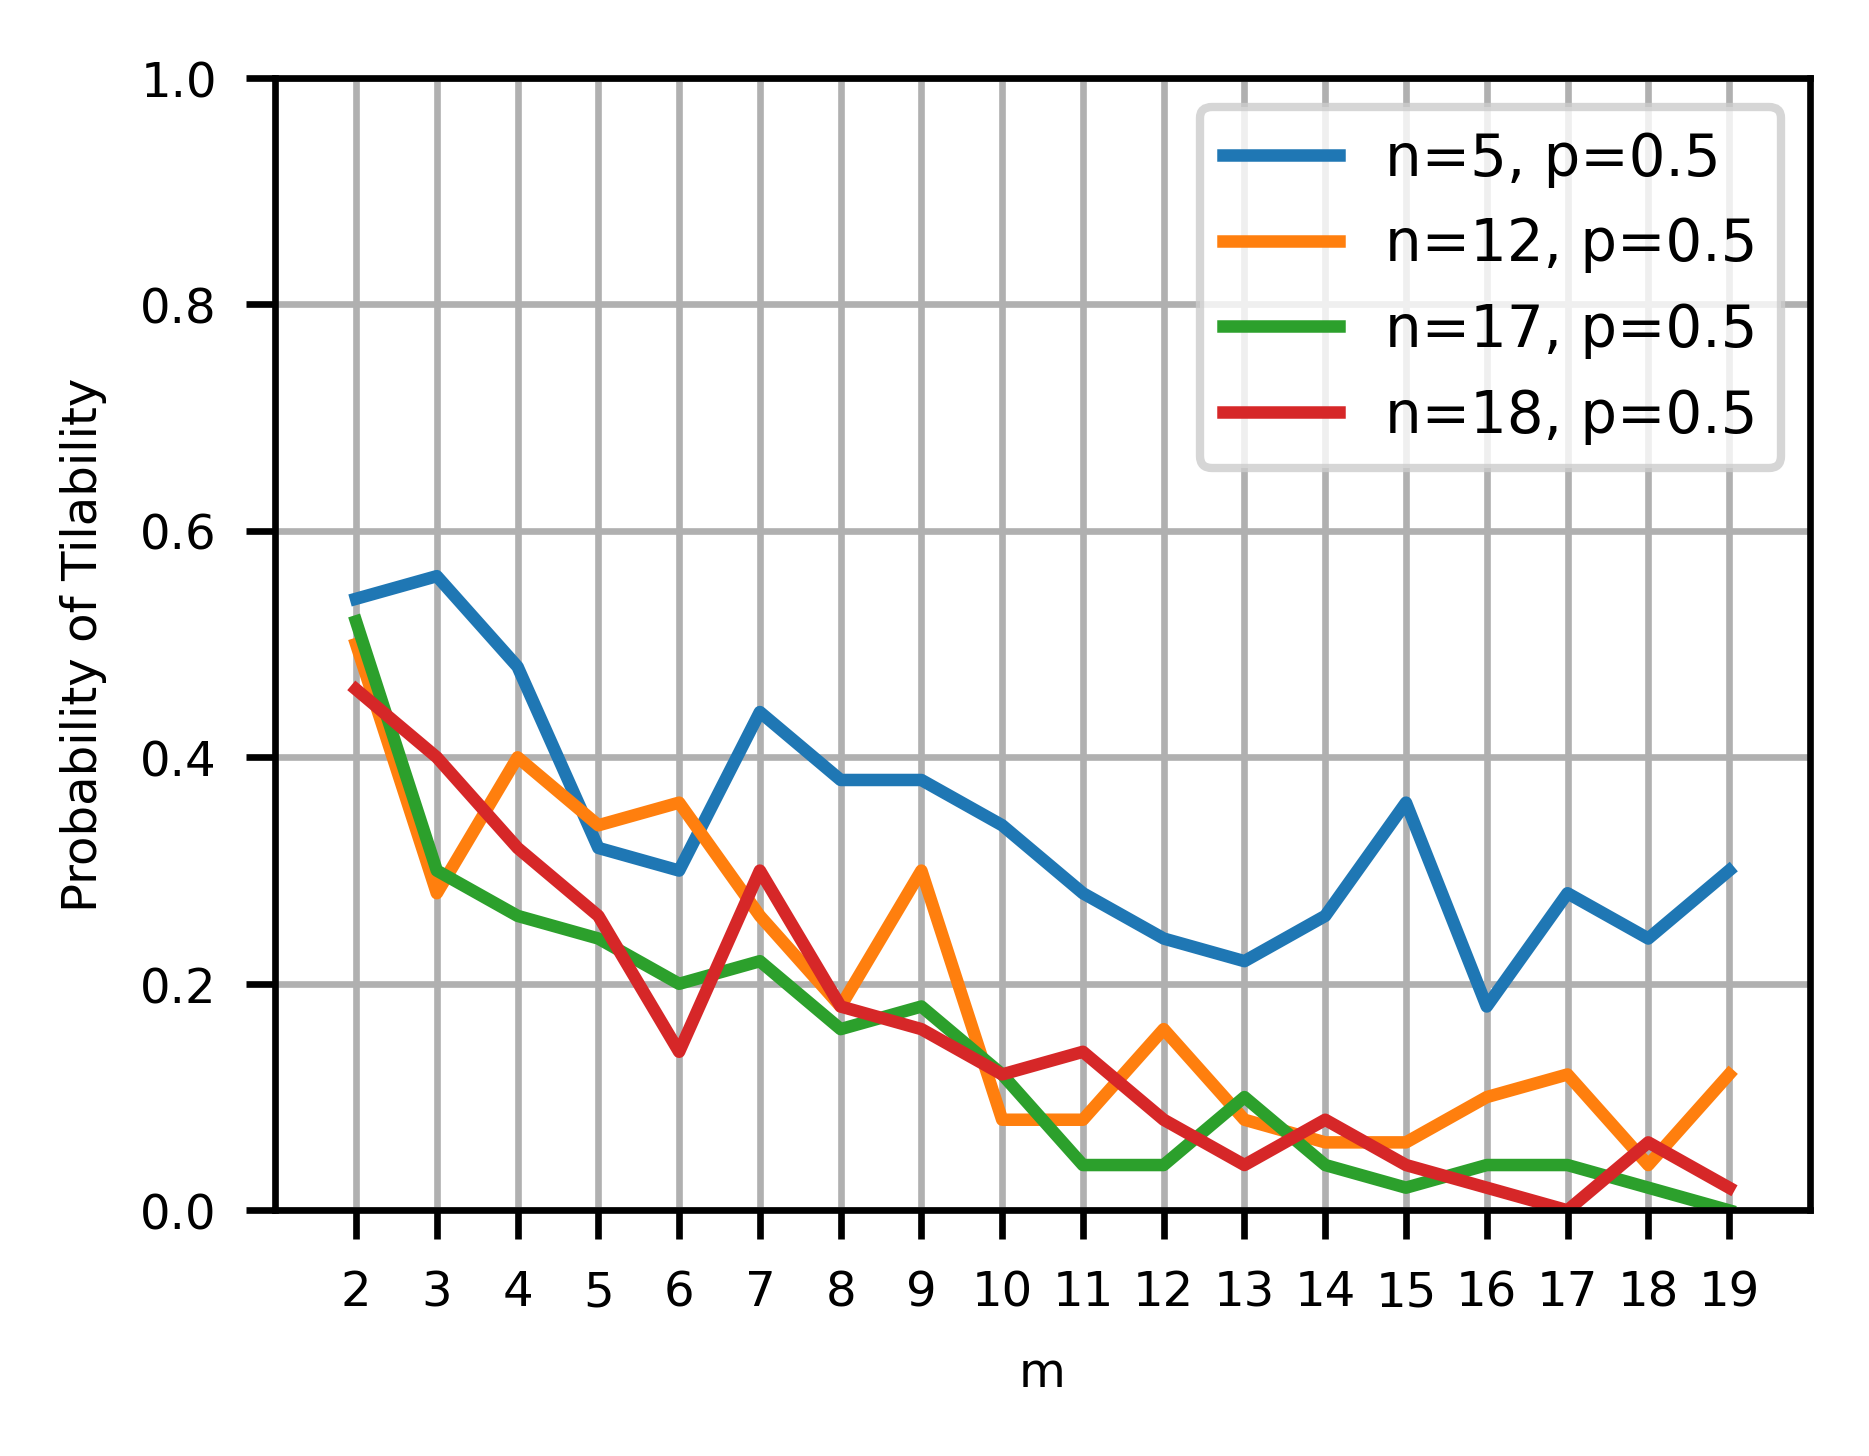

In [95]:

df = pd.read_csv('../inputs/varying_dim_wall_2.csv')

unique_p_values = df['p'].unique()

for p_value in unique_p_values:
    # Create a new figure for each p
    plt.figure(plt.figure(figsize=(3.3, 2.5),dpi=600))
    
    subset_df_p = df[df['p'] == p_value]
    
    unique_n_values = subset_df_p['n'].unique()
    
    # Loop through unique values of n
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        # Plot probability as a function of m
        plt.plot(subset_df['m'], subset_df['probability'], label=f'n={n_value}, p={p_value}')
    
    plt.xlabel('m',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.legend(loc='upper right', fontsize='x-small')
    plt.grid(True)
    xmin, xmax, ymin, ymax = subset_df['m'].min()-1, subset_df['m'].max()+1, 0, 1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(range(int(subset_df['m'].min()), int(subset_df['m'].max()) + 1))
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    if save:
        plt.savefig(f'../inputs/Varying_dim_{p_value}_wall.png', bbox_inches='tight')

plt.show()


### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

2. plots for varying probability p of obstacle existence, and fixed dimensions.

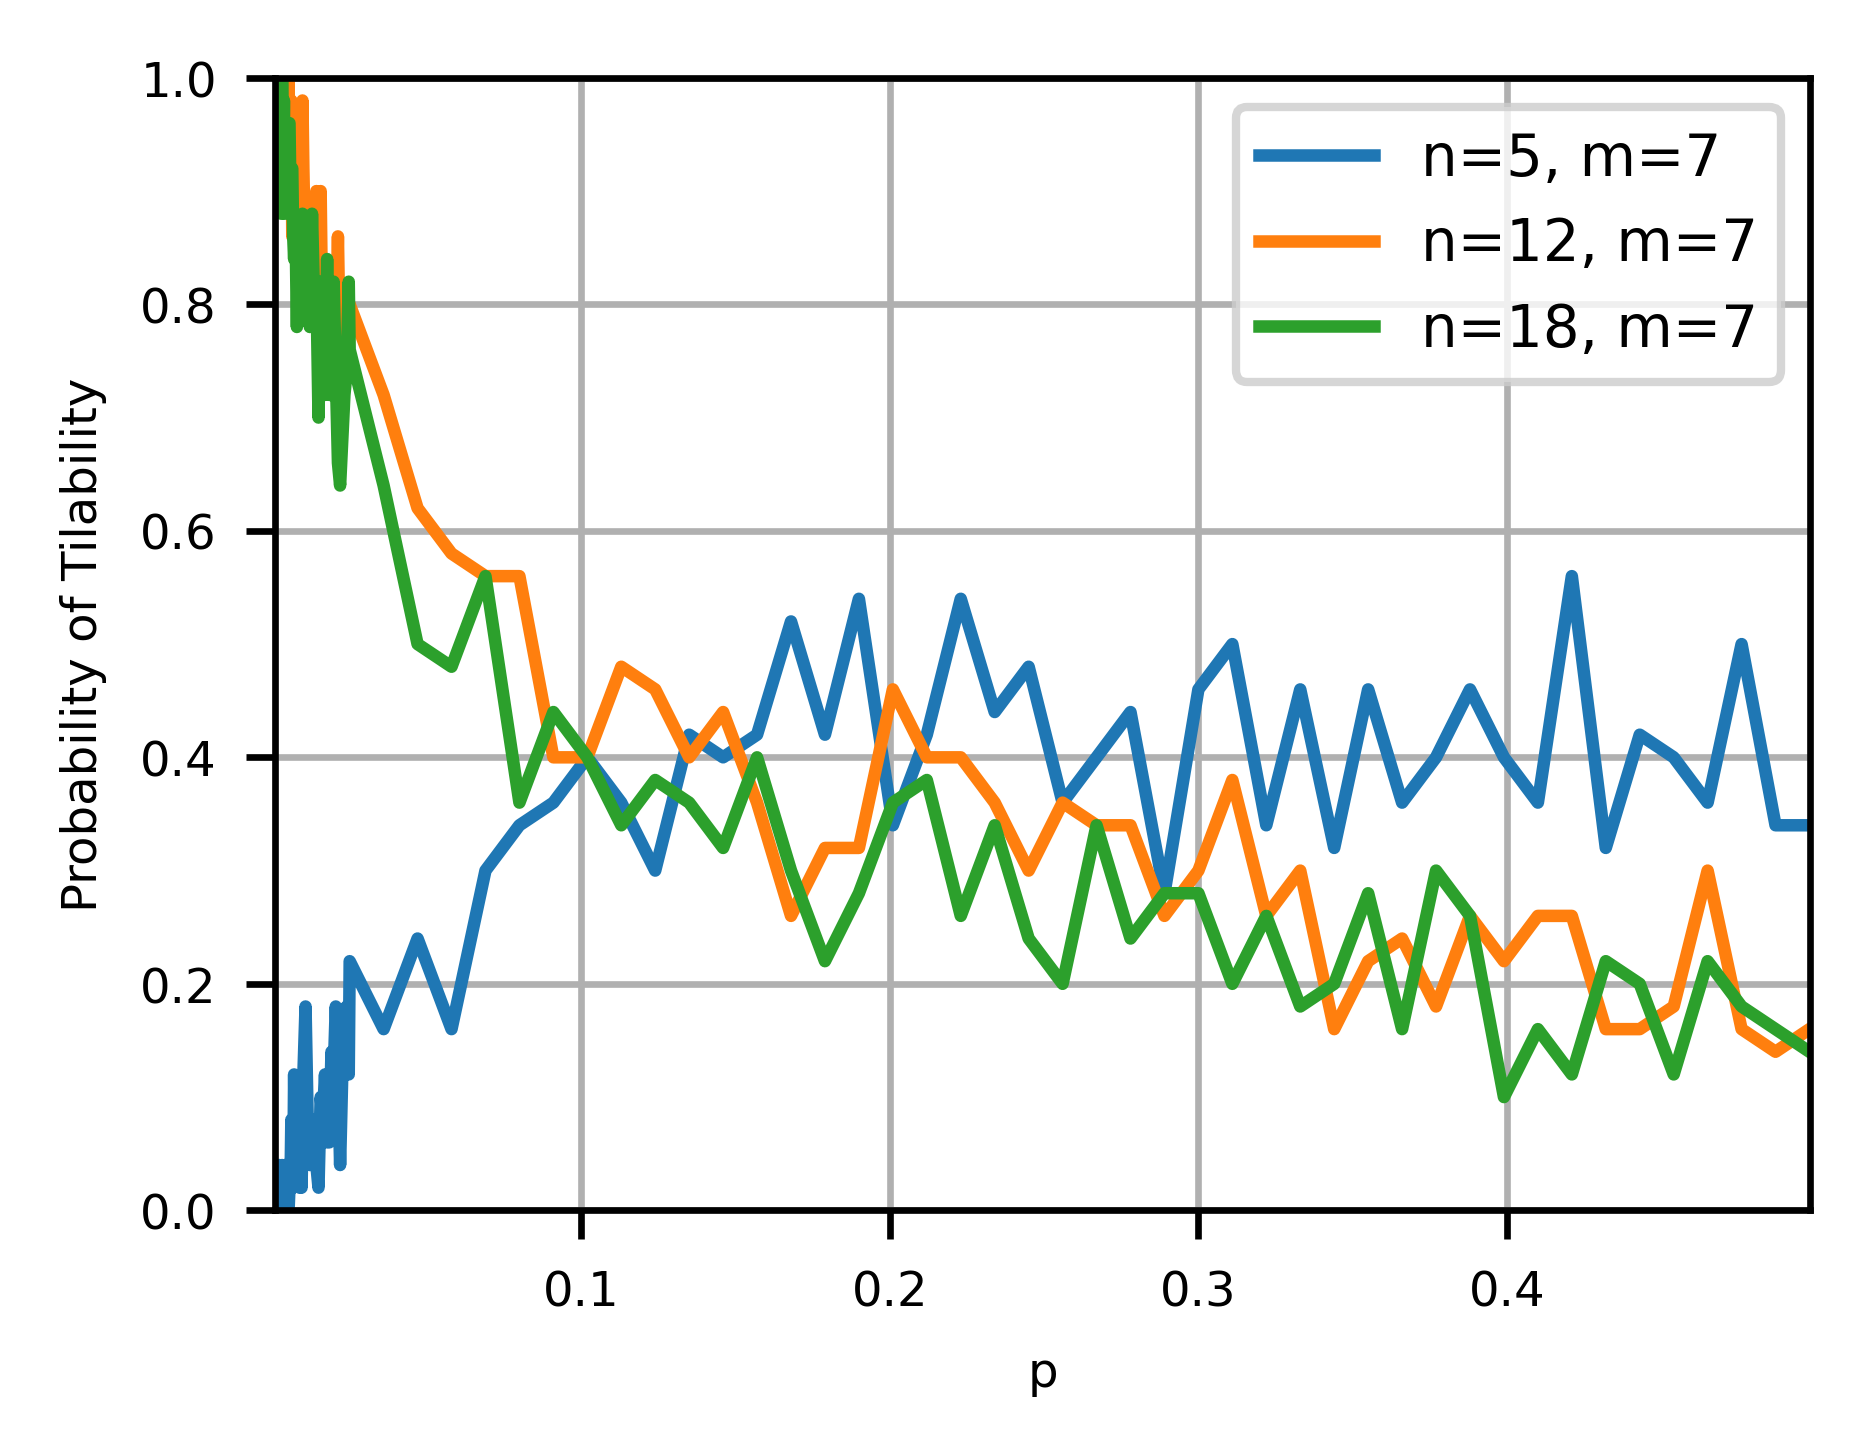

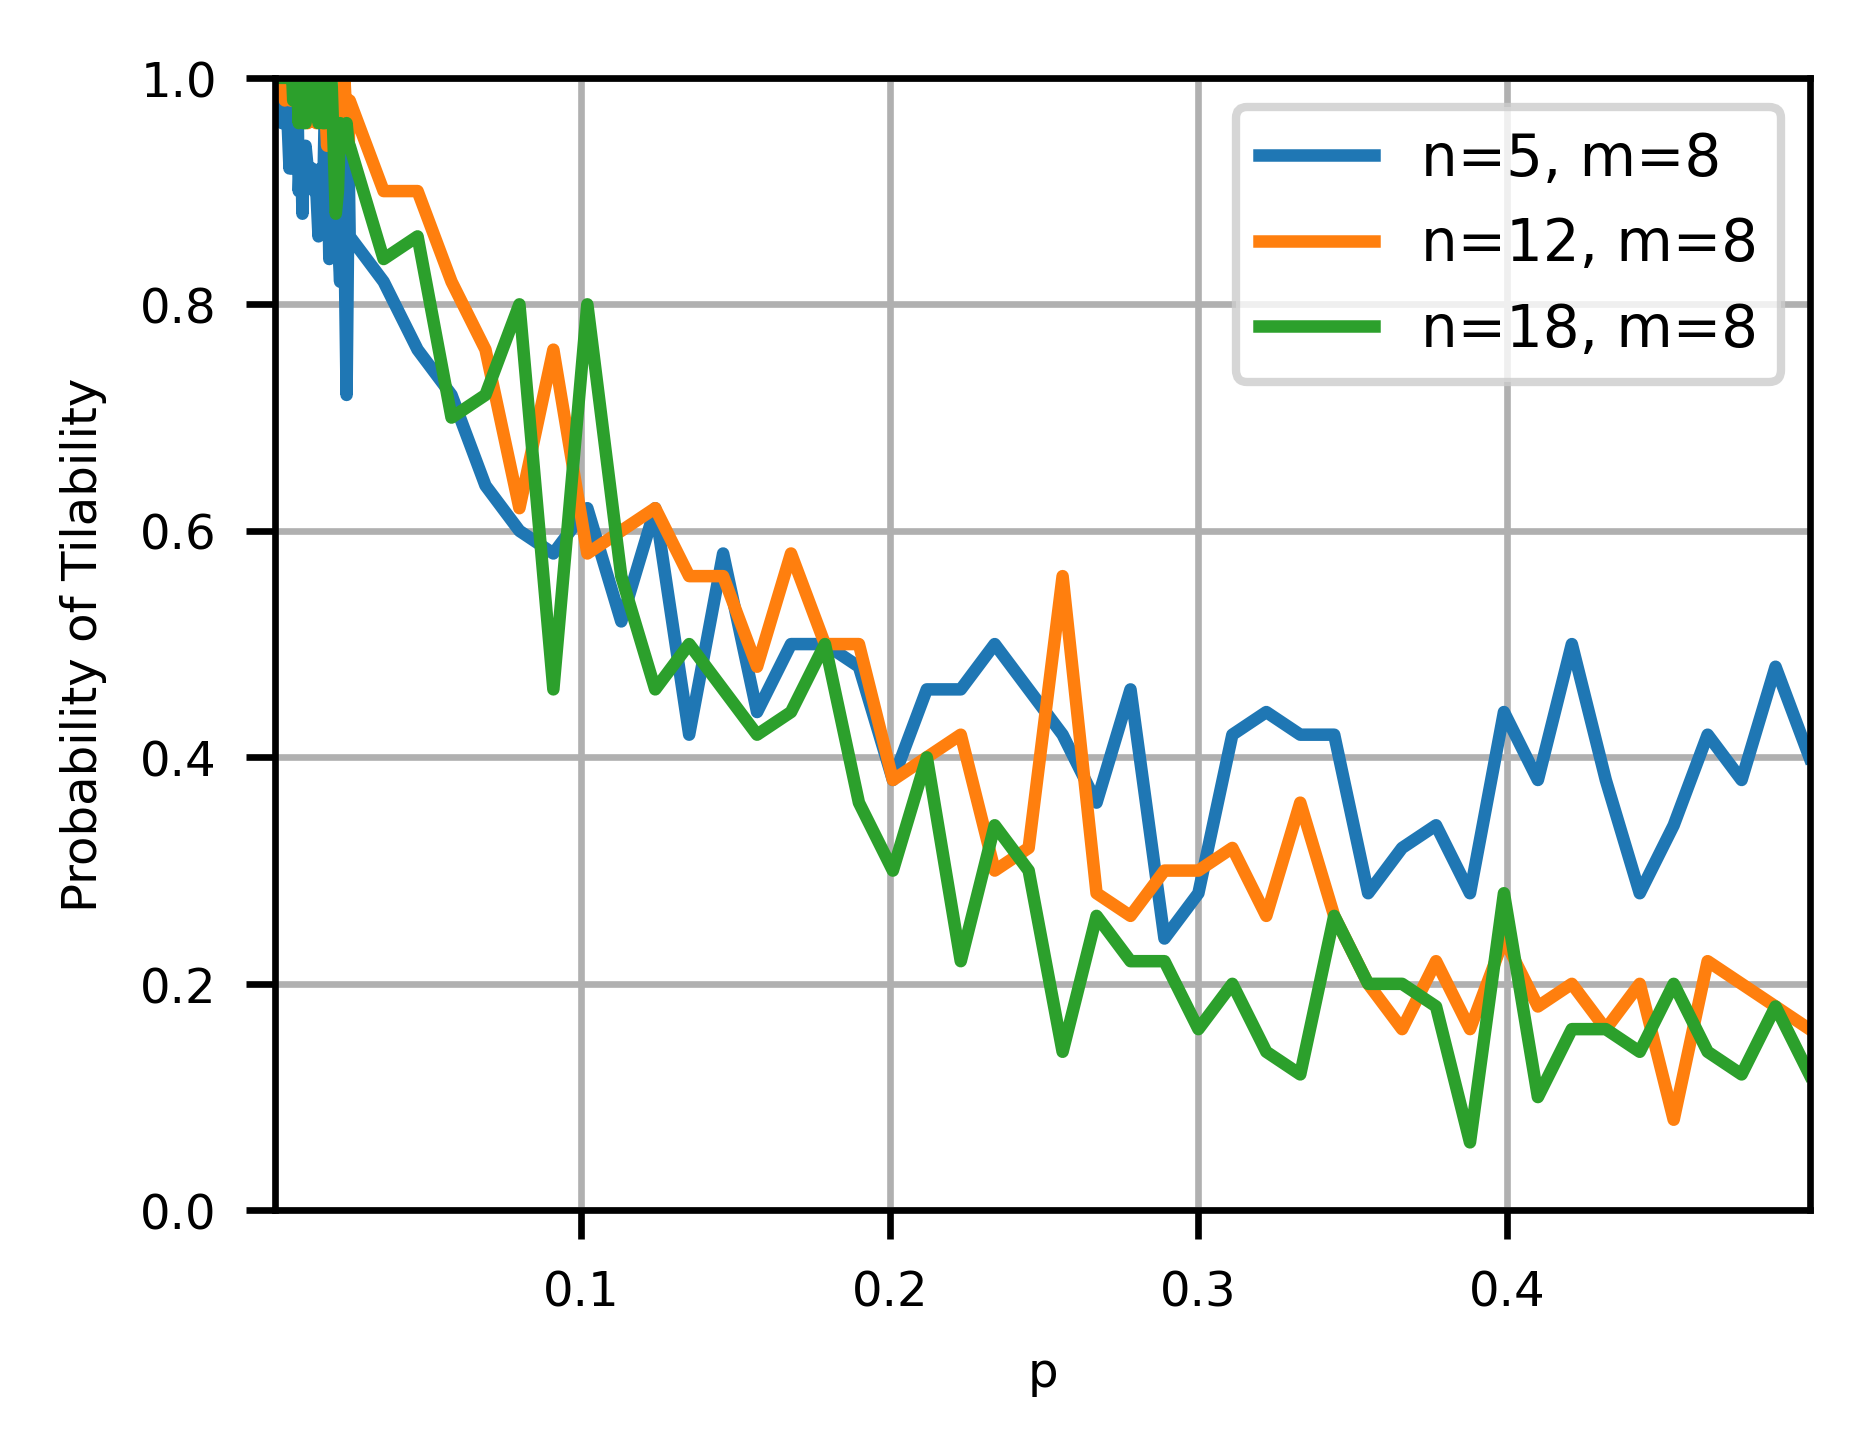

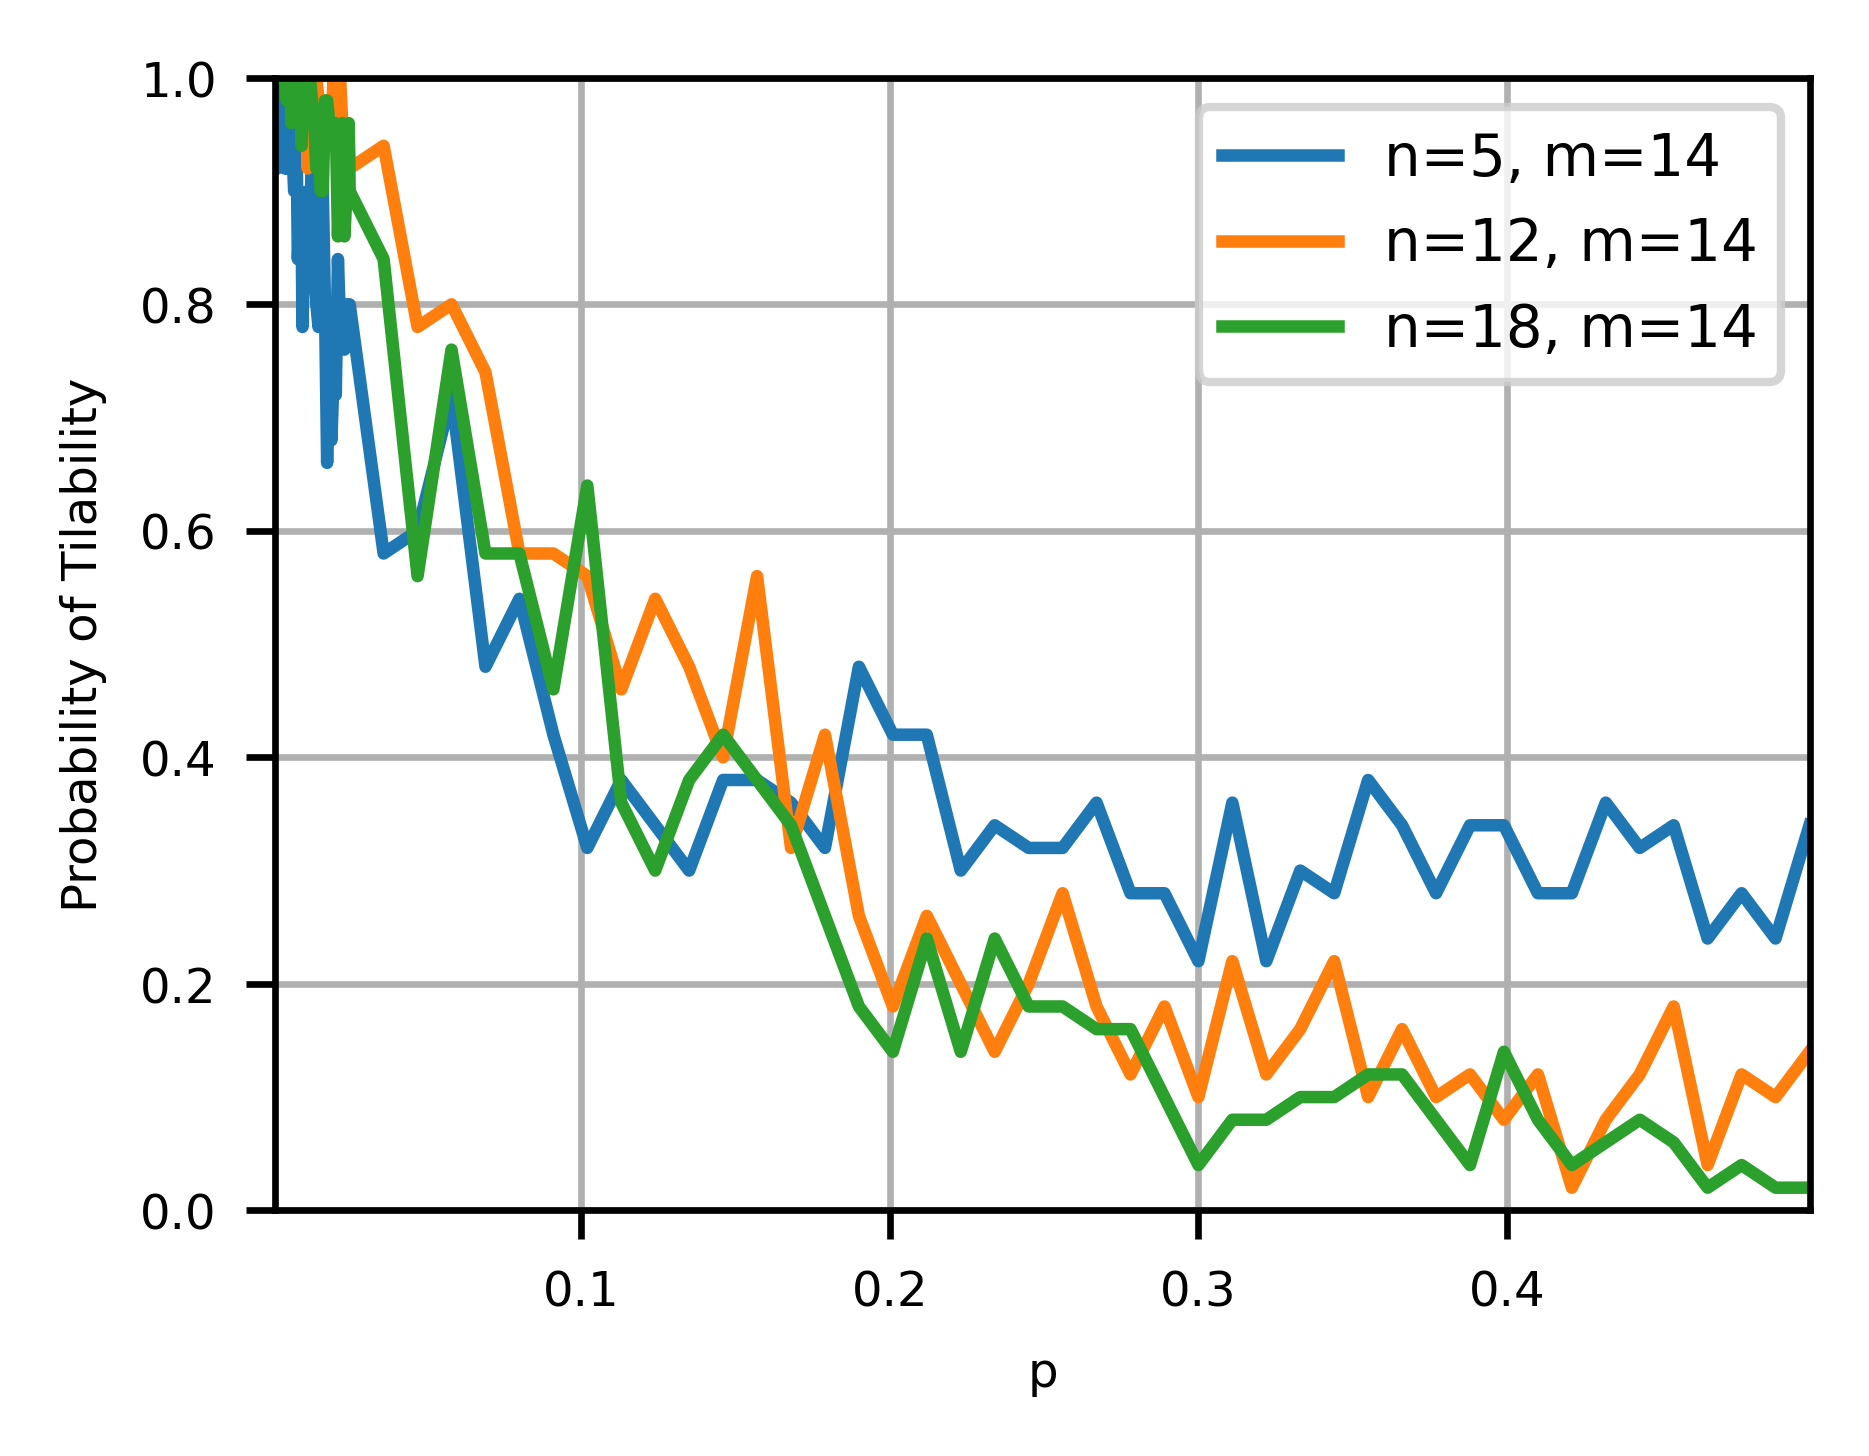

In [96]:
# Varying probability

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../inputs/varying_p_wall.csv')

# Get unique values of m
unique_m_values = df['m'].unique()

for m_value in unique_m_values:
    # Create a new figure for each m
    plt.figure(plt.figure(figsize=(3.3, 2.5),dpi=600))
    
    subset_df_p = df[df['m'] == m_value]
    
    unique_n_values = subset_df_p['n'].unique()
    
    # Loop through unique values of n
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        # Plot probability as a function of p
        plt.plot(subset_df['p'], subset_df['probability'], label=f'n={n_value}, m={m_value}')
    
    plt.xlabel('p',fontsize='xx-small')
    plt.ylabel('Probability of Tilability',fontsize='xx-small')
    plt.legend(loc='upper right', fontsize='x-small')
    plt.grid(True)
    xmin, xmax, ymin, ymax = subset_df['p'].min()-0.0001, subset_df['p'].max()+0.0001, 0, 1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    if save:
        plt.savefig(f'../inputs/Varying_p_{m_value}_wall.png', bbox_inches='tight')
    
plt.show()



3. Zoom near the orgin of the previous plots.

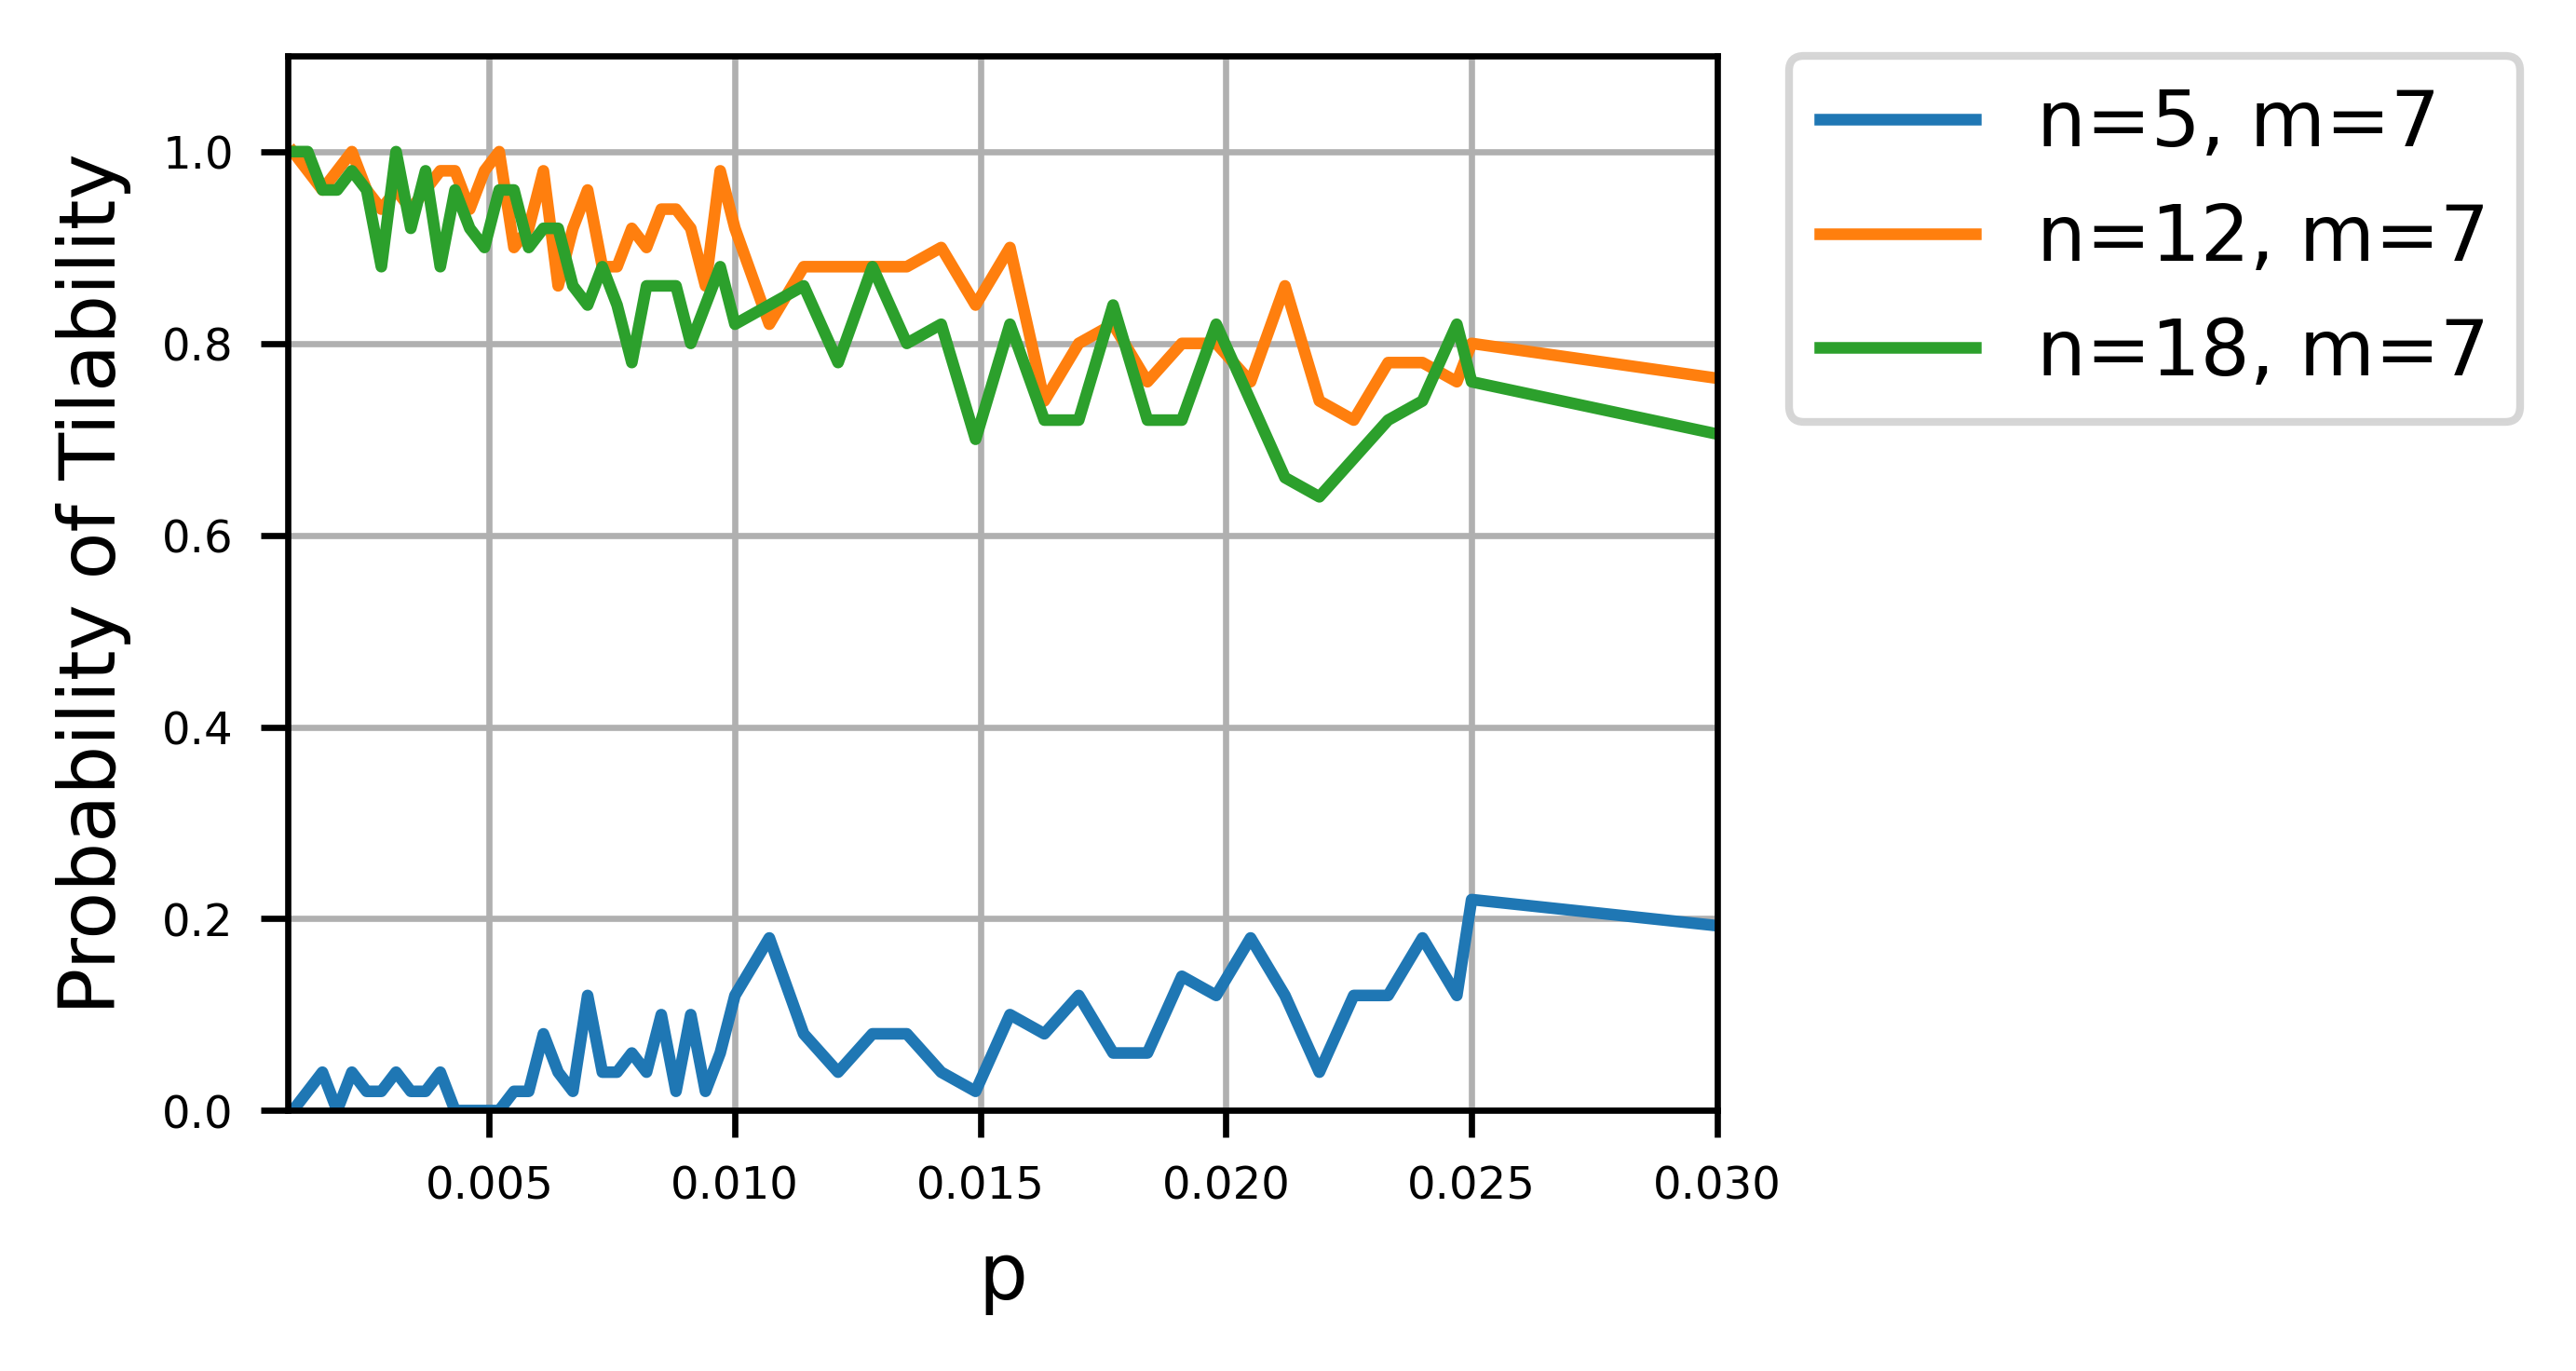

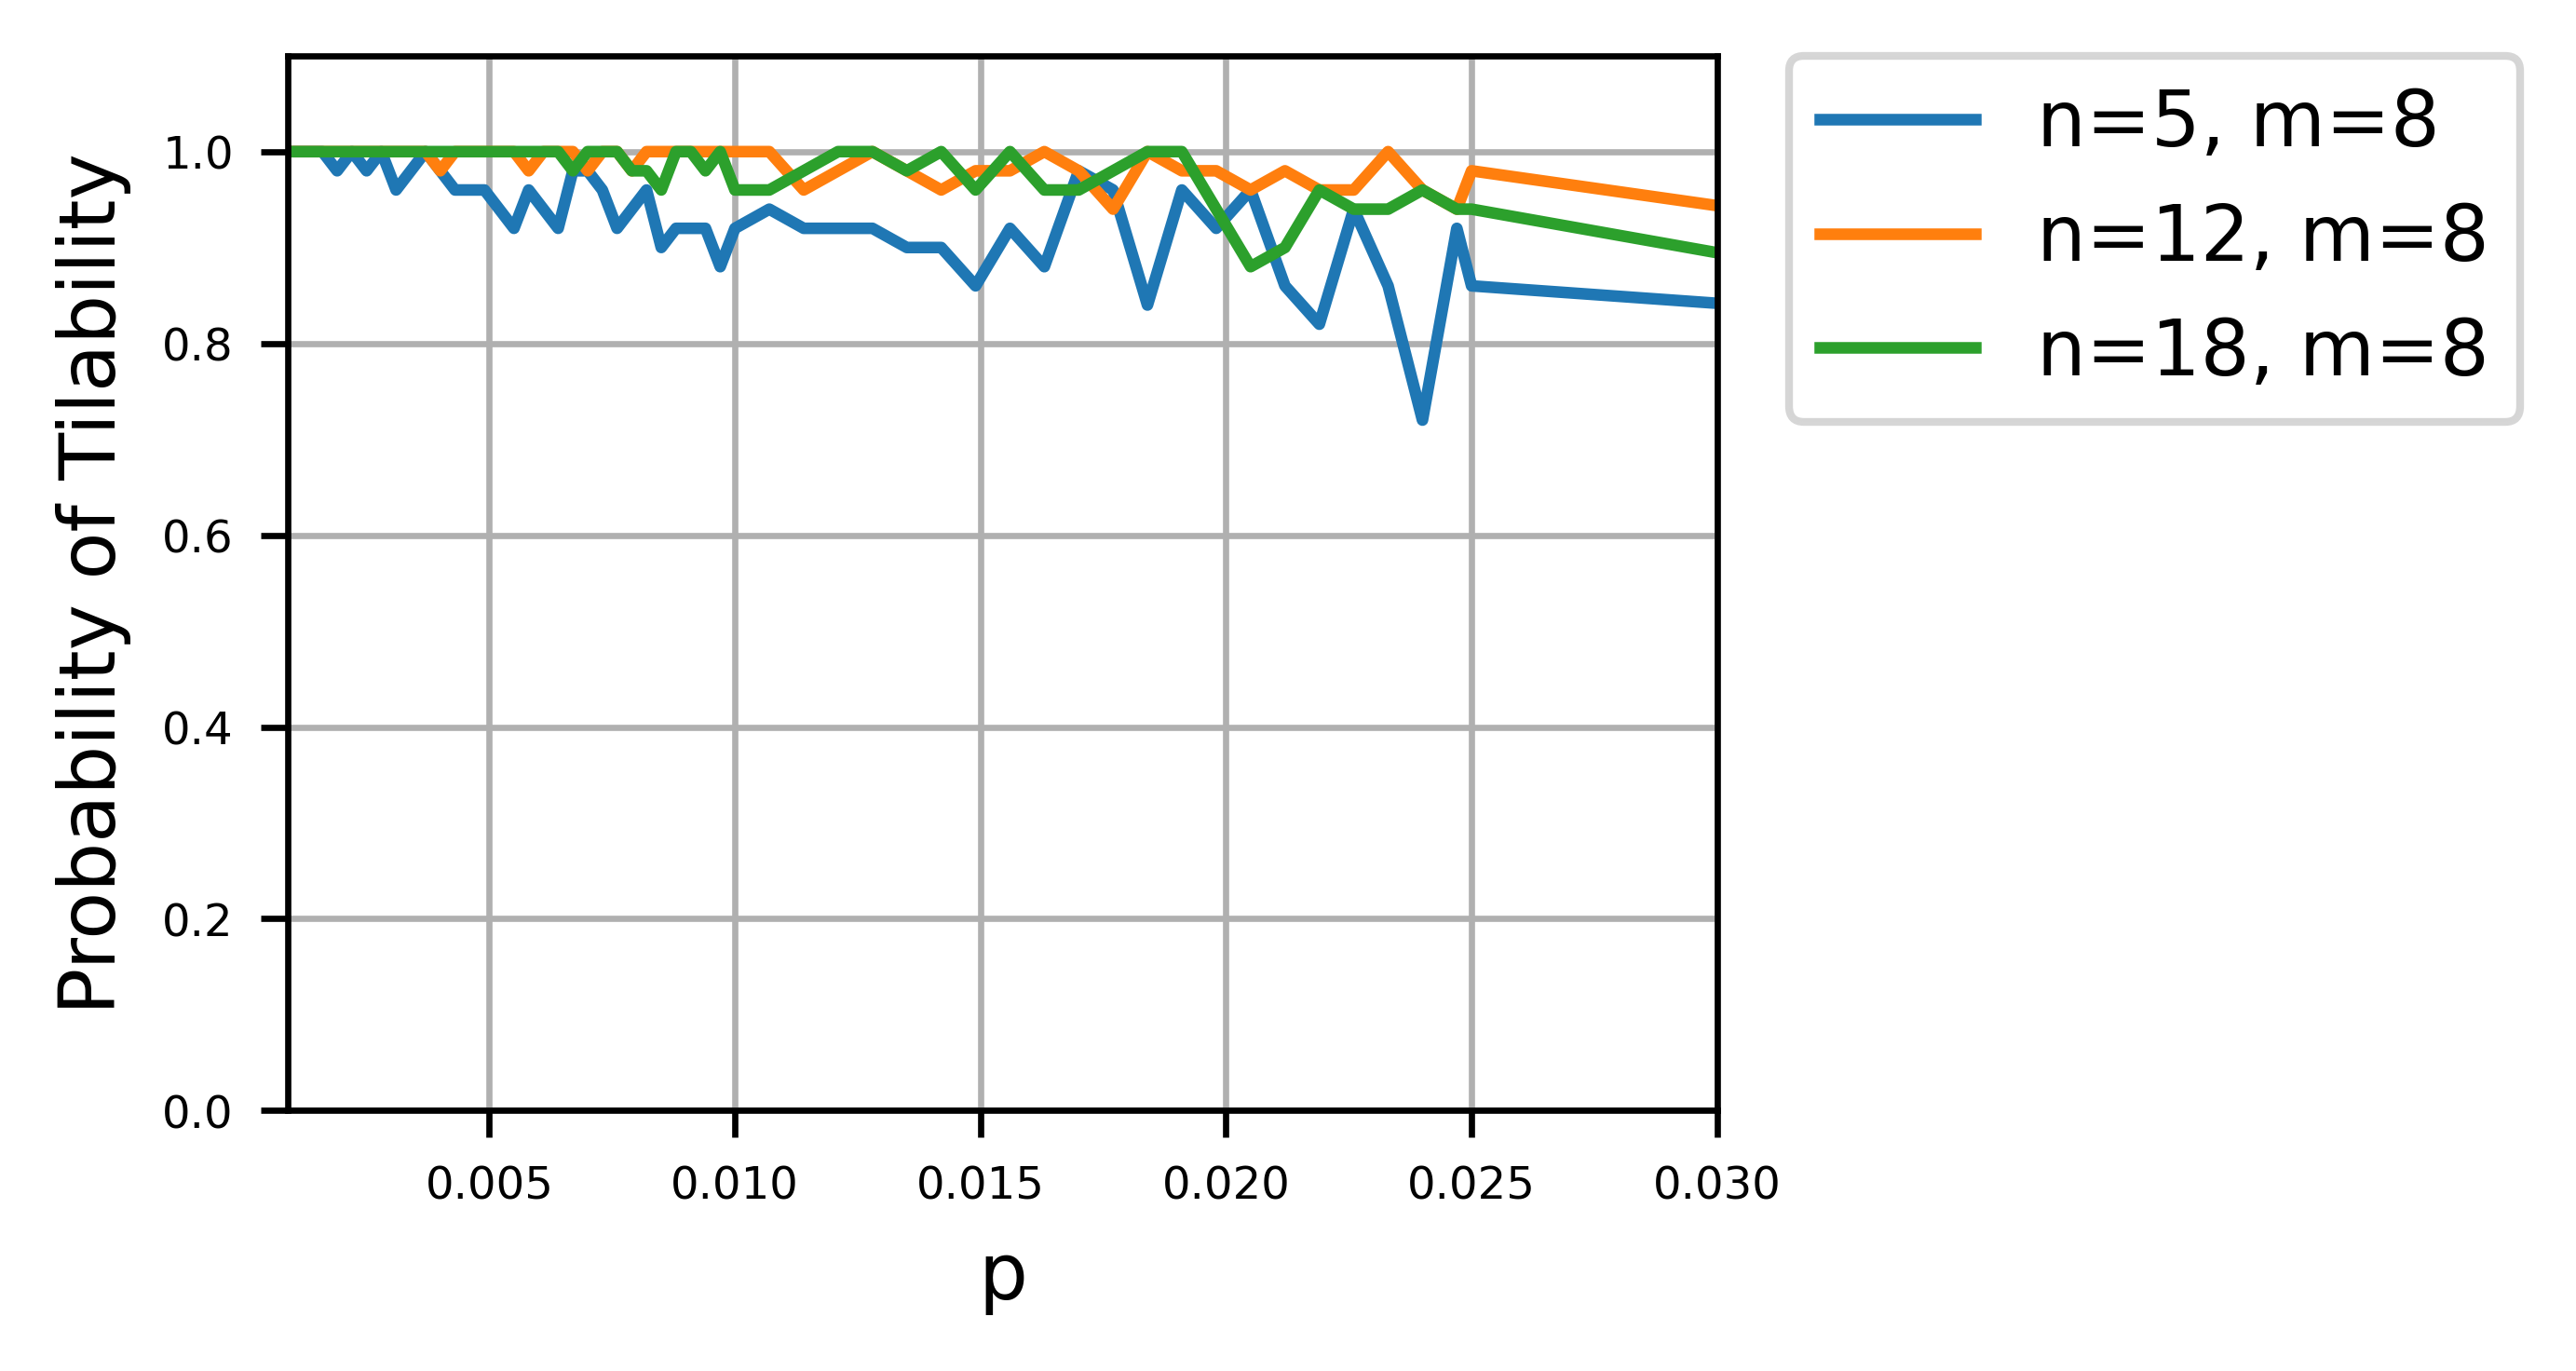

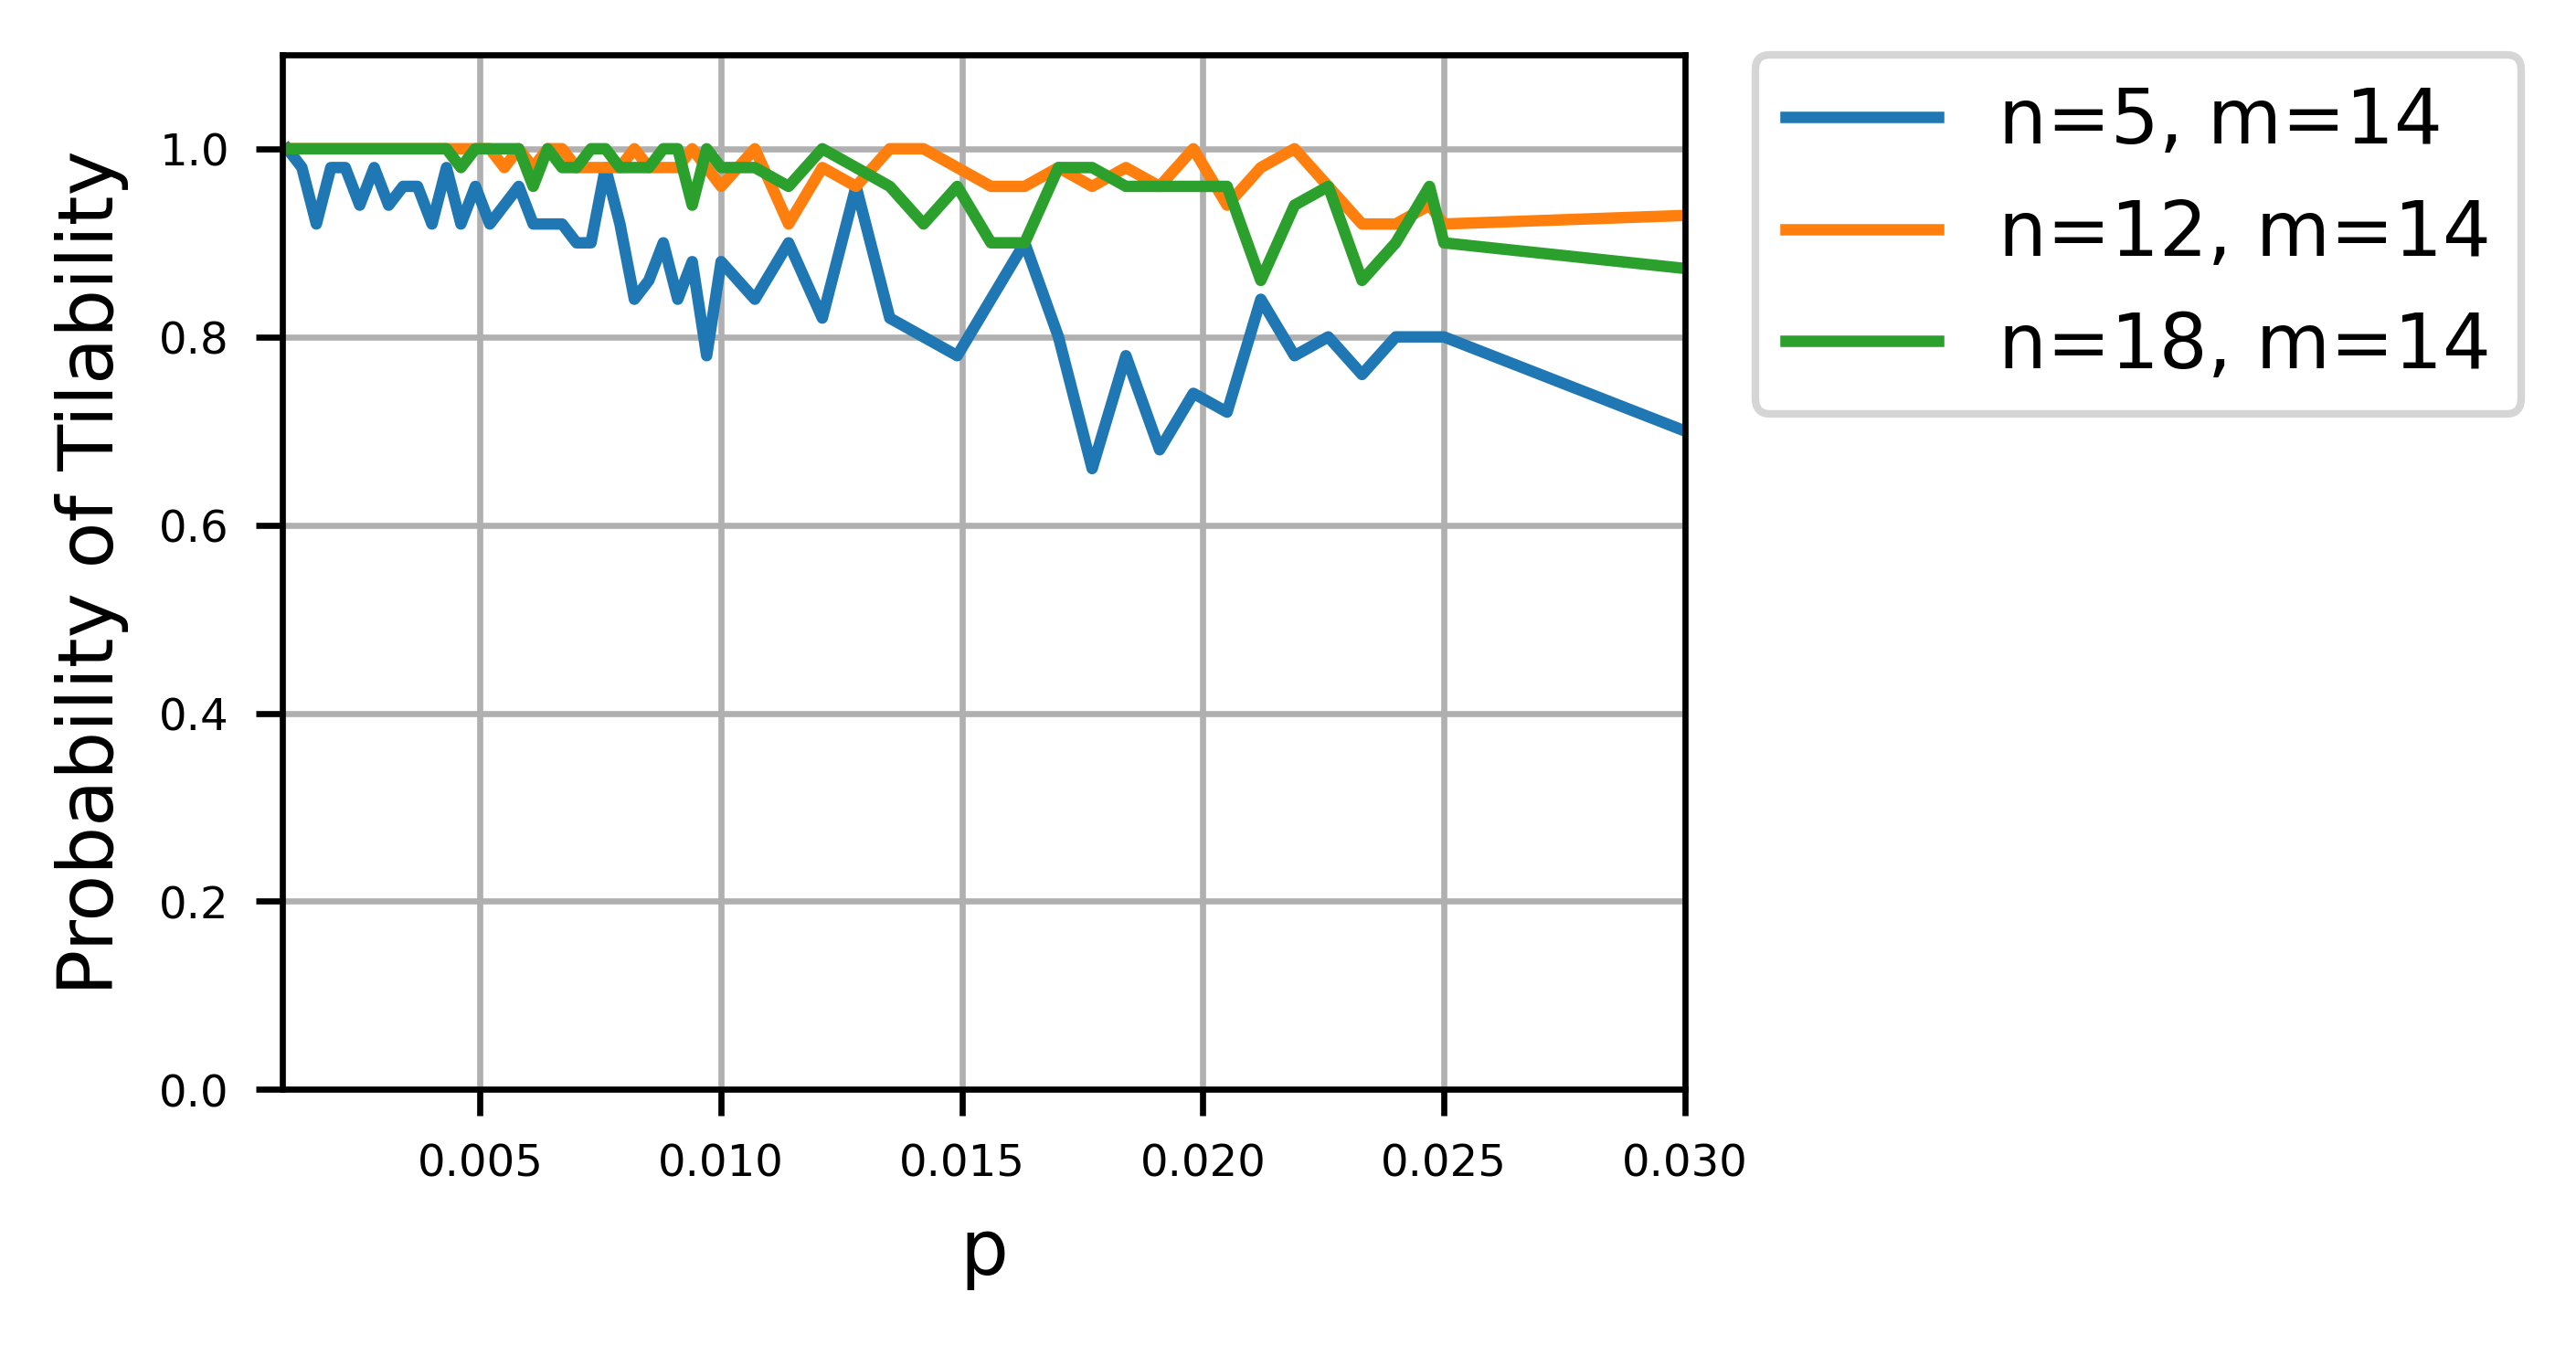

In [97]:
# varying probability, zoom
df = pd.read_csv('../inputs/varying_p_wall.csv')

unique_m_values = df['m'].unique()

for m_value in unique_m_values:
    plt.figure(plt.figure(figsize=(3.3, 2.5),dpi=600))
    
    subset_df_p = df[df['m'] == m_value]
    
    unique_n_values = subset_df_p['n'].unique()
    
    for n_value in unique_n_values:
        subset_df = subset_df_p[subset_df_p['n'] == n_value]
        
        plt.plot(subset_df['p'], subset_df['probability'], label=f'n={n_value}, m={m_value}')
    
    plt.xlabel('p')
    plt.ylabel('Probability of Tilability')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
    plt.grid(True) 
    xmin, xmax, ymin, ymax = subset_df['p'].min()-0.0001, 0.03, 0, 1.1
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xticks(fontsize='xx-small') 
    plt.yticks(fontsize='xx-small') 
    #if save:
    #    plt.savefig(f'../inputs/plot_p_{p_value}.png', bbox_inches='tight')

plt.show()


## Part1: Machine learning models

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.gaussian_process.kernels import RationalQuadratic
from scipy.stats import loguniform
from sklearn.gaussian_process.kernels import RBF

#### Cell Obstacles:
in the following, we train a Kernel ridge regression model to predict the probability of tilability.

In [99]:

data = pd.read_csv('../inputs/tilability_data_500_cell.csv')

X = data[['n', 'm', 'p']].values
y = data['probability'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Kernel Ridge Regression model using RandomizedSearchCV
model = KernelRidge(kernel=RBF())
param_distributions = {
    "alpha": loguniform(1e0, 1e3),
    "gamma": loguniform(1e-2, 1e2),
    "kernel__length_scale": loguniform(1e-2, 1e2),
}
kernel_ridge_tuned = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=500,
    random_state=0,
)
kernel_ridge_tuned.fit(X_train_scaled, y_train)
y_pred = kernel_ridge_tuned.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08291951200129469


Let's plot and compare the model's predictions, against the actual estimated values.

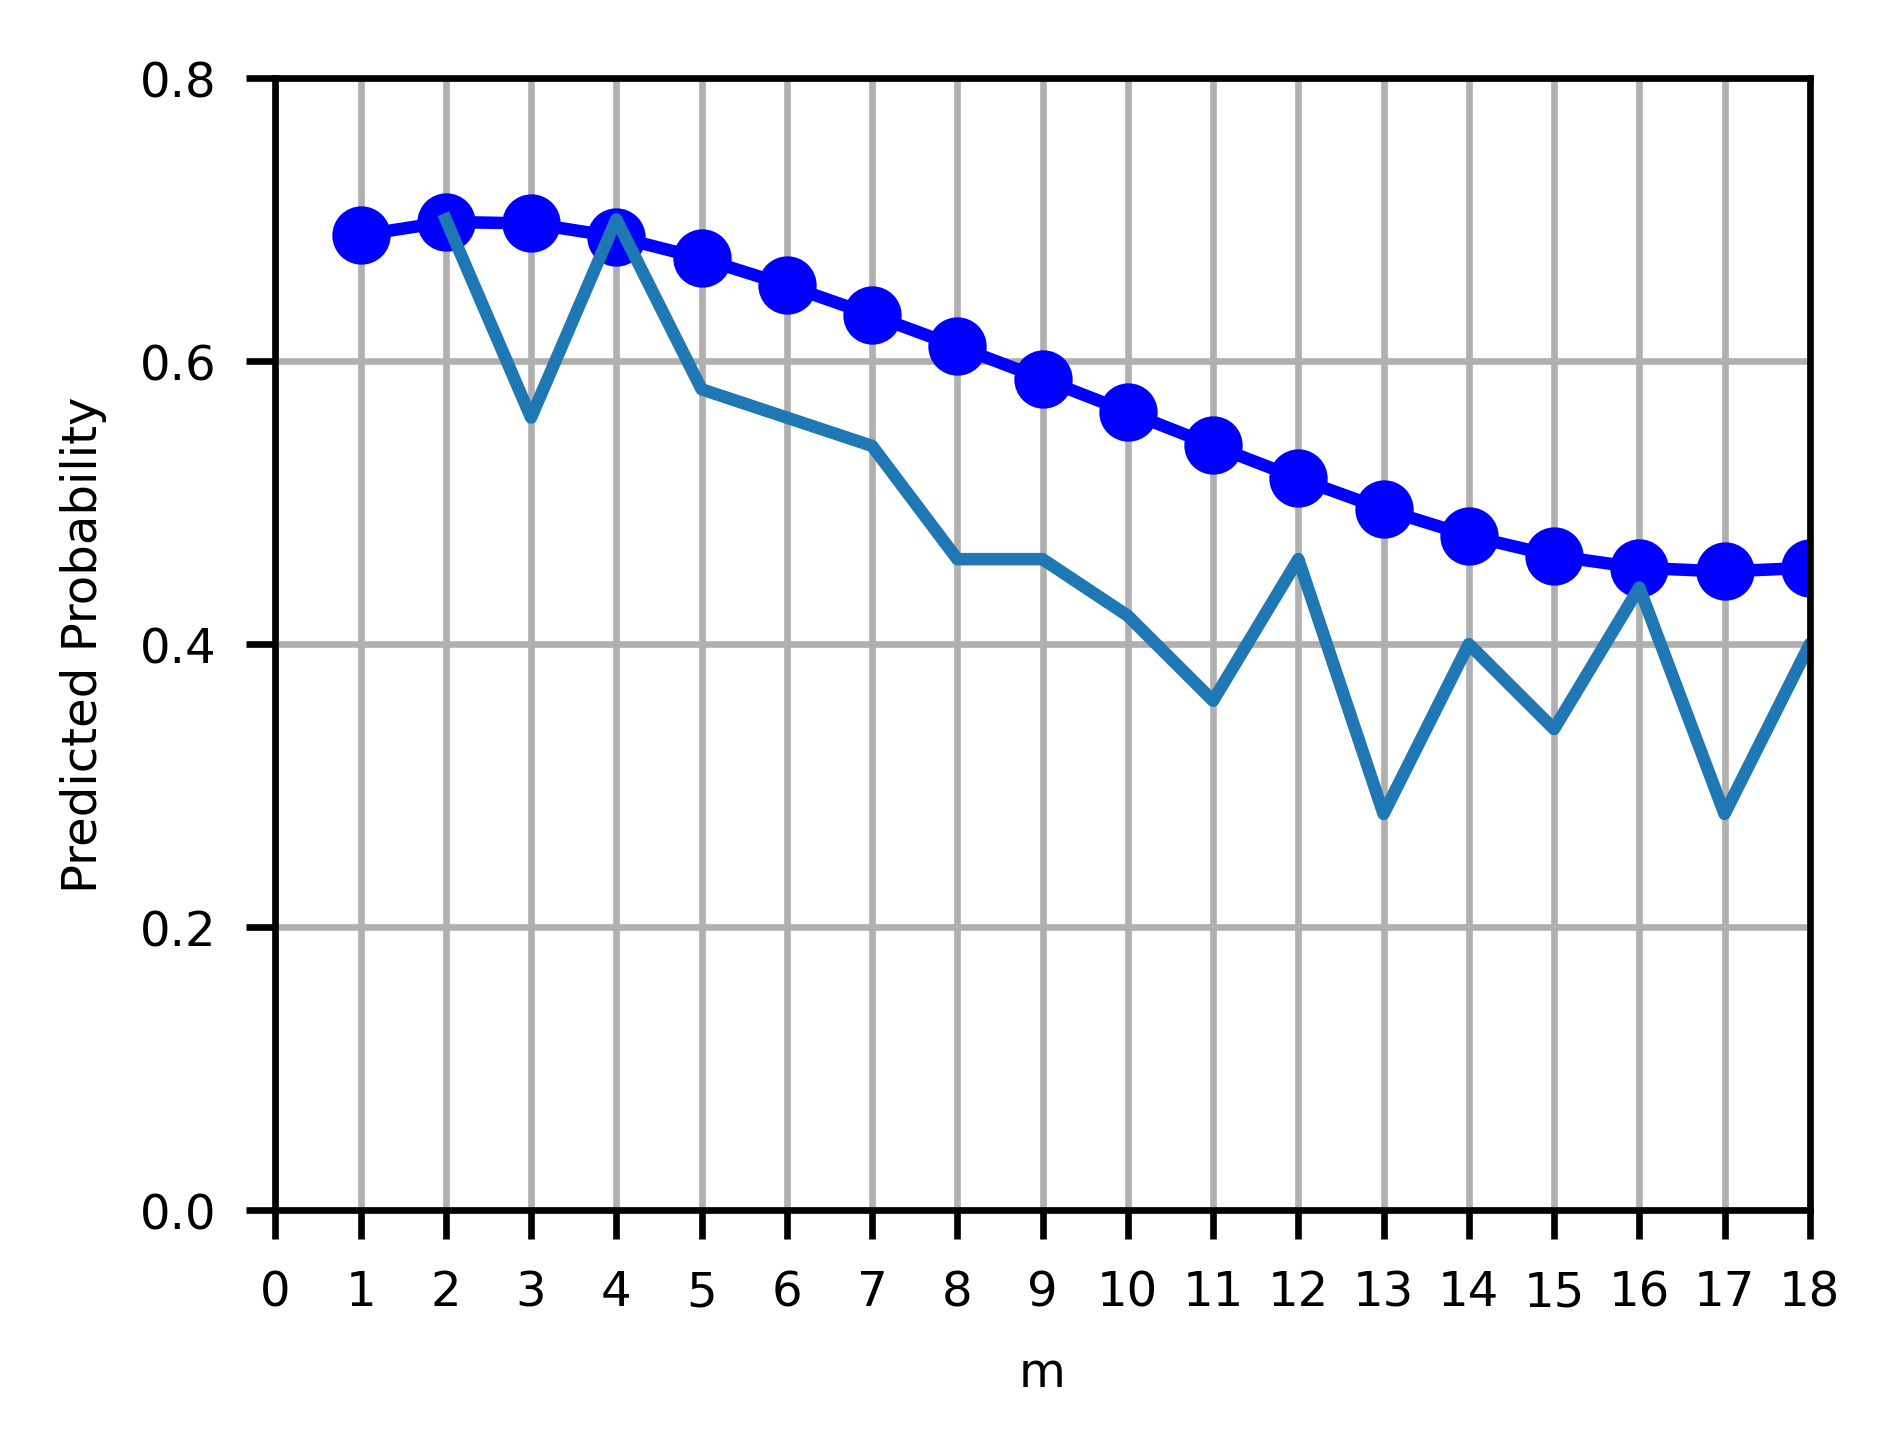

In [100]:
n = 12
p = 0.01
m_values = np.arange(1, 21)
X_pred = np.column_stack((np.full_like(m_values, n), m_values, np.full_like(m_values, p)))
X_pred_scaled = scaler.transform(X_pred)  # Scale the input data

predictions = kernel_ridge_tuned.predict(X_pred_scaled)

# Plot the predictions
plt.figure(plt.figure(figsize=(3.3, 2.5),dpi=600))
plt.plot(m_values, predictions, marker='o', linestyle='-', color='b')


df = pd.read_csv('../inputs/varying_dim_cell.csv')
subdf= df[df['n']==12]
plt.plot(subdf['m'], subdf['probability'])

plt.xlabel('m',fontsize='xx-small')
plt.ylabel('Predicted Probability',fontsize='xx-small')
plt.grid(True)
xmin, xmax, ymin, ymax = 0, 18, 0, 0.8
plt.axis([xmin, xmax, ymin, ymax])
plt.xticks(range(0, 19))
plt.xticks(fontsize='xx-small') 
plt.yticks(fontsize='xx-small') 
if save:
    plt.savefig(f'../inputs/Ml_model_{p_value}.png', bbox_inches='tight')
    
plt.show()

#### Wall Obstacles:
in the following, we use Kernel Ridge regression with the rational quadratic kernel
to predict the probability of tilability.

In [101]:
data = pd.read_csv('../inputs/tilability_data_500_wall.csv')

X = data[['n', 'm', 'p']].values
y = data['probability'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Kernel Ridge Regression model
model = KernelRidge(kernel=RationalQuadratic(length_scale=1, alpha=15))
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = kernel_ridge_tuned.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1746974720769368


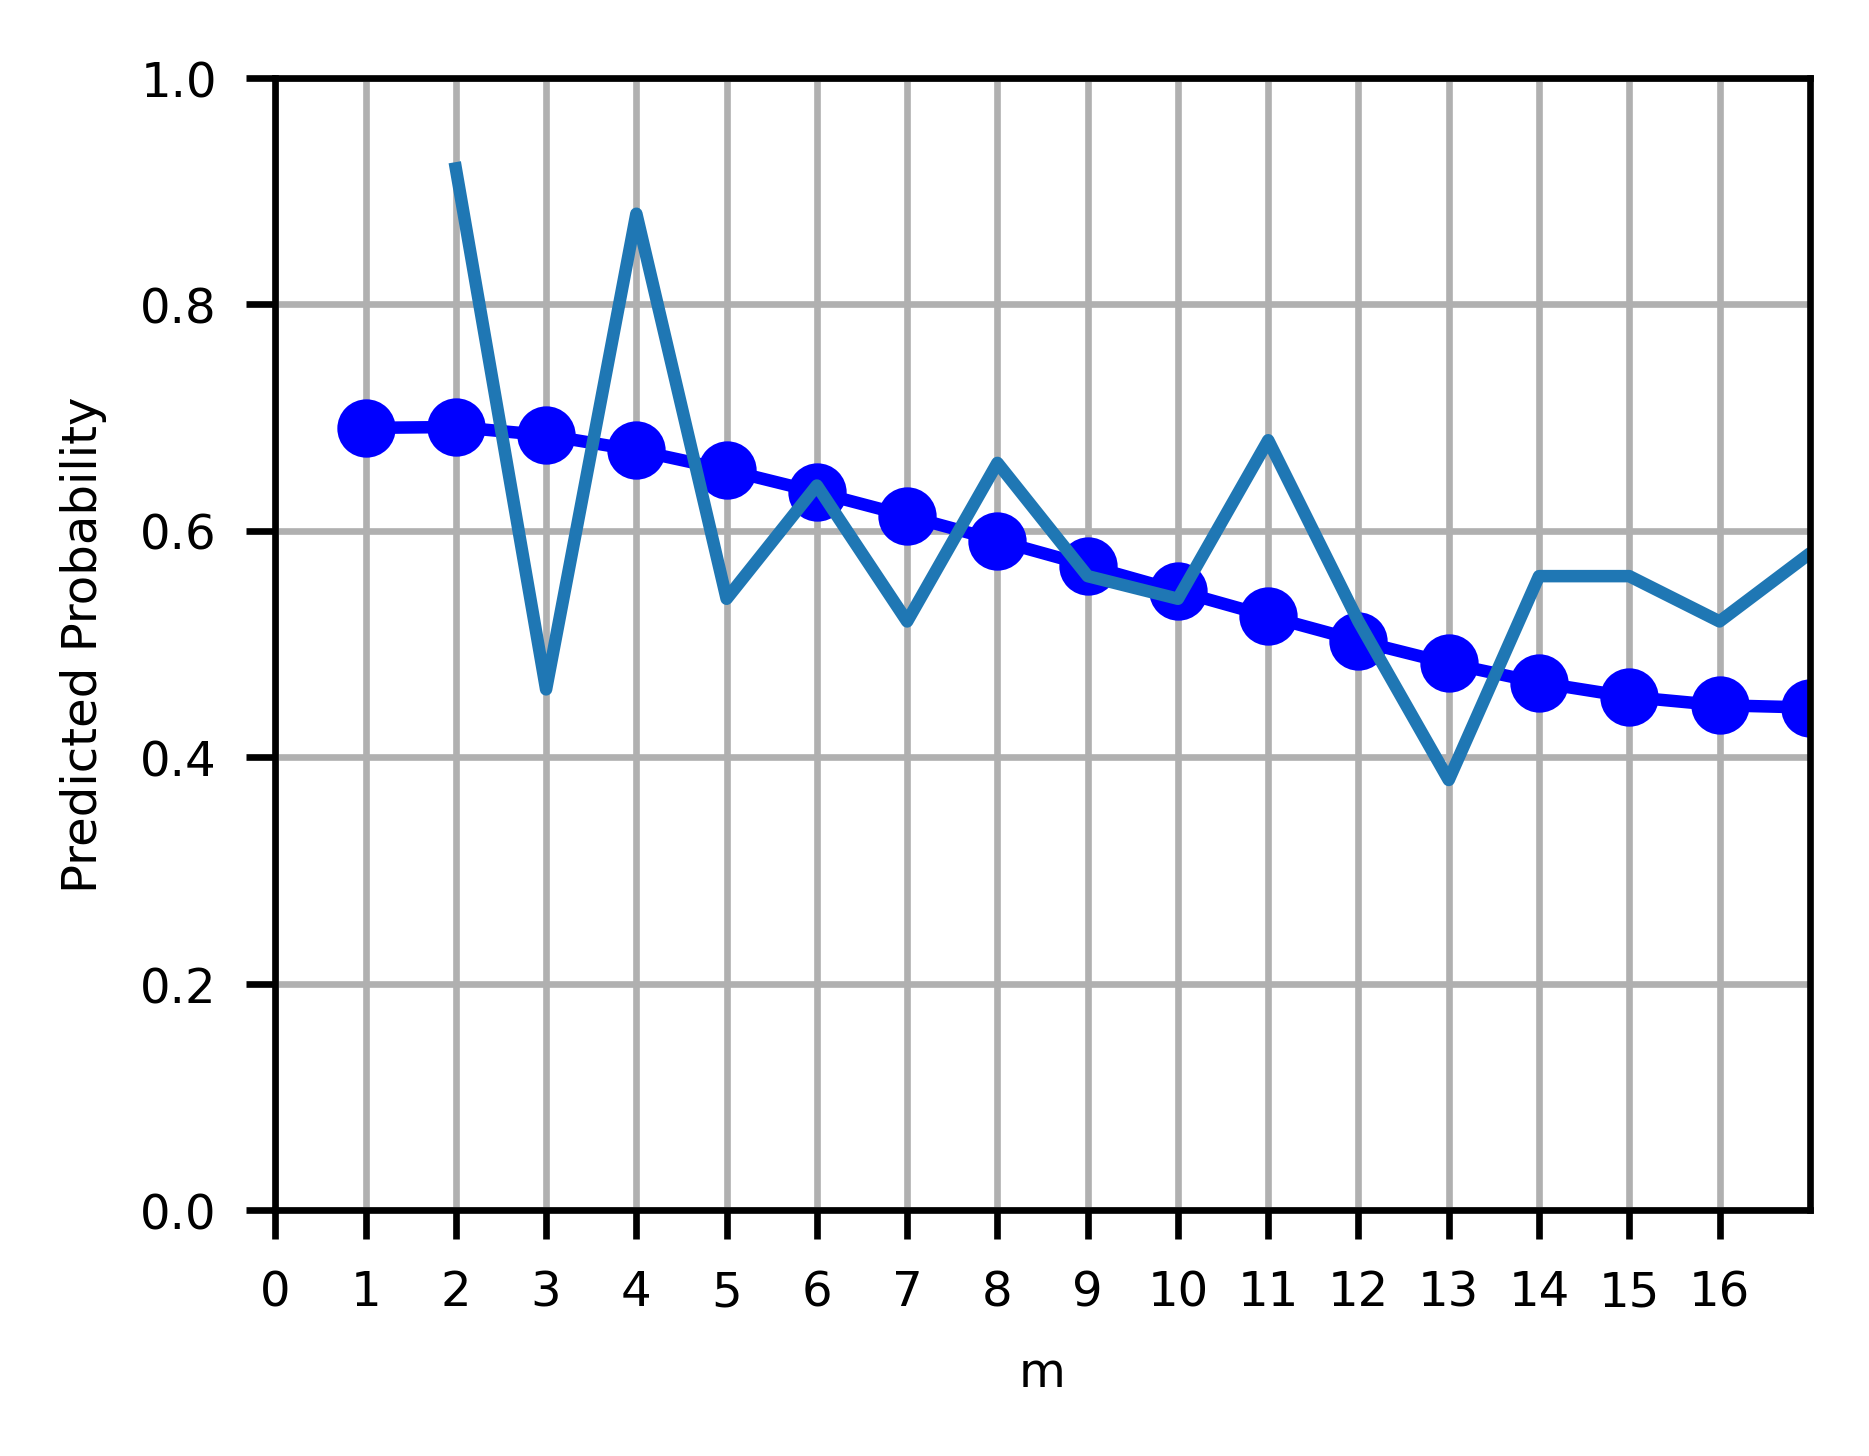

In [102]:
# Define the values of n and p
n = 12
p = 0.1
m_values = np.arange(1, 21)
X_pred = np.column_stack((np.full_like(m_values, n), m_values, np.full_like(m_values, p)))
X_pred_scaled = scaler.transform(X_pred)  # Scale the input data
# Make predictions using the best model
predictions = kernel_ridge_tuned.predict(X_pred_scaled)

# Plot the predictions
plt.figure(plt.figure(figsize=(3.3, 2.5),dpi=600))
plt.plot(m_values, predictions, marker='o', linestyle='-', color='b')


df = pd.read_csv('../inputs/varying_dim_wall_2.csv')
subdf= df[df['p']==0.1]
subdf= subdf[subdf['n']==12]
plt.plot(subdf['m'], subdf['probability'])

plt.xlabel('m',fontsize='xx-small')
plt.ylabel('Predicted Probability',fontsize='xx-small')
plt.grid(True)
xmin, xmax, ymin, ymax = 0, 17, 0, 1
plt.axis([xmin, xmax, ymin, ymax])
plt.xticks(range(0, 17))
plt.xticks(fontsize='xx-small') 
plt.yticks(fontsize='xx-small') 
if save:
    plt.savefig(f'../inputs/Ml_model_{p_value}_wall.png', bbox_inches='tight')
    
plt.show()